**Análisis de modelos**

**Preparación de datos**

Importamos los datos, preparamos el dataset y creamos los conjuntos de entrenamiento.

Creamos conjuntos de entrenamiento con diferentes algoritmos de oversampling

In [1]:
from sklearn.model_selection import train_test_split
from src.data_utils.data_utils import read_data, prepare_dummy_cols, normalize_num_vars

excel_file_path = "D:\\develop\\predict_lapse\\data\\BBDD_Impago_1.0.xlsx"

df = read_data(excel_file_path)

cat_vars = ['Canal', 'Domiciliacion', 'Figuras', 'Motor', 'Pago', 'SegundoConductor', 'Tipo_Furgoneta', 'Tipo_Moto', 'Tipo_Turismo',  'Zonas_Zona1', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

feature_cols = ['Pago', 'Domiciliacion', 'Anyomatricula', 'Prima', 'Valor',
                'ValorVehículo', 'Motor_2', 'Motor_3', 'Canal', 'Socioec', 'Antigüedad', 'Carnet', 'SegundoConductor', 'Figuras', 'Tipo_Moto', 'Tipo_Turismo', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

df_dummy = prepare_dummy_cols(df, ['Tipo', 'Zonas', 'Motor'] )

num_vars = ['Anyomatricula', 'Valor', 'Prima', 'ValorVehículo', 'Socioec','Antigüedad', 'Carnet']

X = df_dummy[feature_cols]
y = df['Impago']

# Importante que la variable objetivo se distribuya en el conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = normalize_num_vars(X_train, num_vars)
X_test = normalize_num_vars(X_test, num_vars)




Aplicamos diferentes alogoritmos de oversampling y comprobamos cómo funcionan con el modelo de regresión logística.

In [3]:
from src.model_utils.oversampling import over_sm, over_adasyn, over_bsm, over_svmsm, over_random

# Generamos los dataset con los diferentes métodos de oversampling
X_train_ro, y_train_ro = over_random(X_train, y_train, 0.05)
X_train_sm, y_train_sm = over_sm(X_train, y_train, 0.05)
X_train_adasyn, y_train_adasyn = over_adasyn(X_train, y_train, 0.05)
X_train_bsm, y_train_bsm = over_bsm(X_train, y_train, 0.05)
X_train_svmsm, y_train_svmsm = over_svmsm(X_train, y_train, 0.05)



Obtenemos los componentes principales para proyectar en un gráfico los 2 primeros componentes principales y observar como se distribuyen los datos
Realizamos esto para todos los algoritmos de sobremuestreo, para así poder ver cómo se distribuyen los nuevos impagos creados.

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.102671       0.027944      -0.141114  0.591651 -0.074872   
PCA2  0.062793      -0.043717      -0.265008 -0.215163 -0.224472   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1       0.663313  0.208598  0.000936  0.016402 -0.030912  ... -0.008469   
PCA2      -0.011665  0.014215 -0.001918  0.095451 -0.475377  ...  0.033283   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.269000      0.210173    -0.021813    -0.002175     0.001353   
PCA2  -0.021538     -0.003619    -0.046789     0.027460     0.005022   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.017152    -0.000106    -0.000965     0.001448  
PCA2    -0.024258     0.000386     0.000807    -0.000994  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.20196027 0.18271414]
Sum of explained variance ratio for first two c

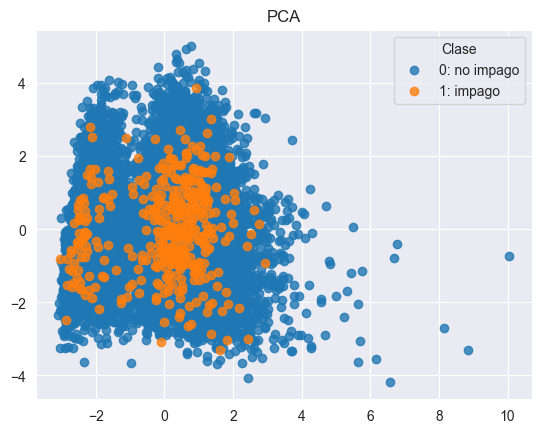

TSNE            TSNE1      TSNE2
0      62.381702   4.769782
1     -14.932183  35.598423
2      56.515907   9.749430
3      14.999878  64.648285
4     -49.267860   5.521664
...          ...        ...
23371   2.948168 -16.871803
23372 -88.334183 -19.508732
23373  -0.623504  41.180588
23374  15.597688  34.967484
23375  51.037132  47.307297

[23376 rows x 2 columns]


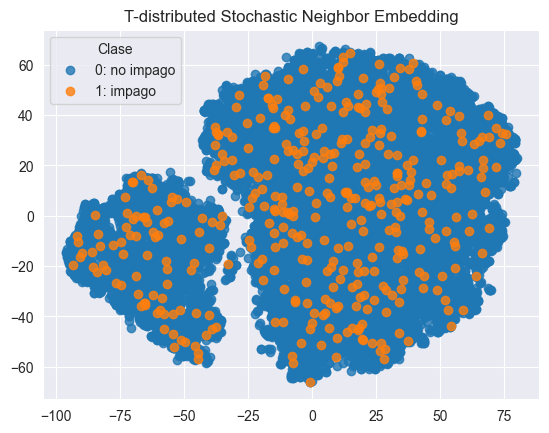

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.102217       0.038522      -0.054078  0.580637 -0.029253   
PCA2  0.044169      -0.032508      -0.257625 -0.118125 -0.272448   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1       0.711441  0.193171  0.003334 -0.015526  0.053040  ... -0.003517   
PCA2       0.107542  0.045860 -0.001096  0.106767 -0.500737  ...  0.029807   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.237932      0.193136    -0.015228    -0.006420     0.002262   
PCA2  -0.067890      0.034456    -0.057019     0.031963     0.006383   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.023647     0.000474    -0.000010     0.001915  
PCA2    -0.020727    -0.000160     0.002218    -0.000337  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.21746104 0.1757782 ]
Sum of explained variance ratio for first two c

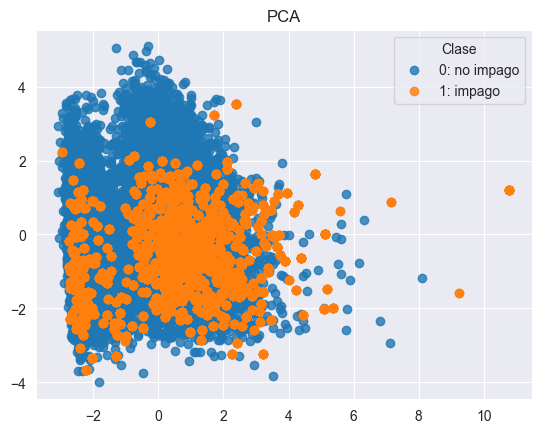

TSNE            TSNE1      TSNE2
0      67.967606  37.405056
1     -30.658262  27.040377
2      60.212582  15.495608
3     -12.429834   8.585769
4     -52.081036  -2.673192
...          ...        ...
27221 -98.666763 -29.143270
27222 -28.682447 -54.802887
27223 -59.282494 -54.824455
27224 -59.282494 -54.824455
27225  24.366468  -3.492726

[27226 rows x 2 columns]


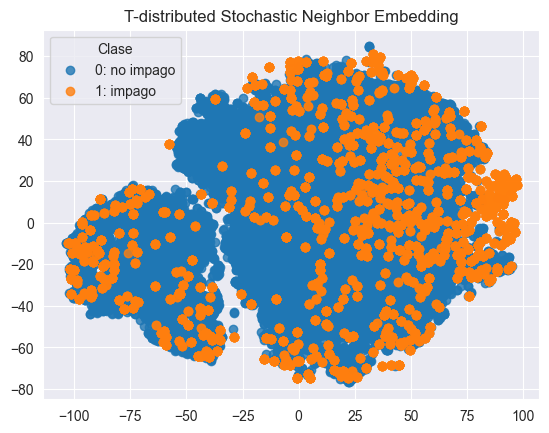

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.112925       0.036788      -0.069146  0.580837 -0.023207   
PCA2  0.048350      -0.030499      -0.261809 -0.116781 -0.256446   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1       0.703319  0.202651  0.002647 -0.022583  0.044955  ... -0.008698   
PCA2       0.108725  0.045336 -0.001105  0.109970 -0.486678  ...  0.032660   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.239519      0.200093    -0.012079    -0.003327     0.002249   
PCA2  -0.068705      0.031386    -0.057605     0.028936     0.005700   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.030923     0.002058     0.000046     0.001614  
PCA2    -0.022803    -0.000587     0.002210    -0.000186  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.2190869  0.17632341]
Sum of explained variance ratio for first two c

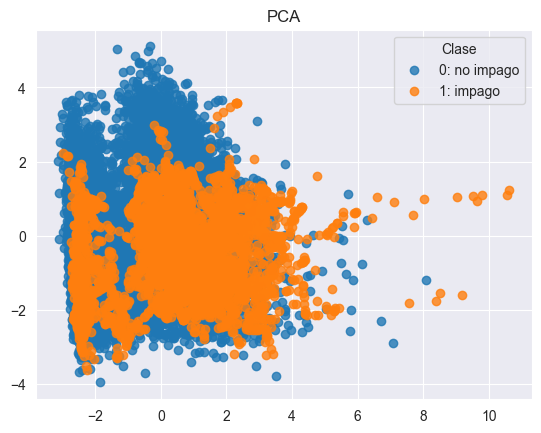

TSNE            TSNE1      TSNE2
0      66.074043  34.880447
1     -30.956940  26.005249
2      62.327110  13.947763
3     -24.436007  13.354505
4     -52.827335   4.233844
...          ...        ...
27221   1.967622 -37.120617
27222  39.474224   6.346571
27223  33.005127  26.422091
27224  66.774124 -18.987024
27225  31.427309   4.520604

[27226 rows x 2 columns]


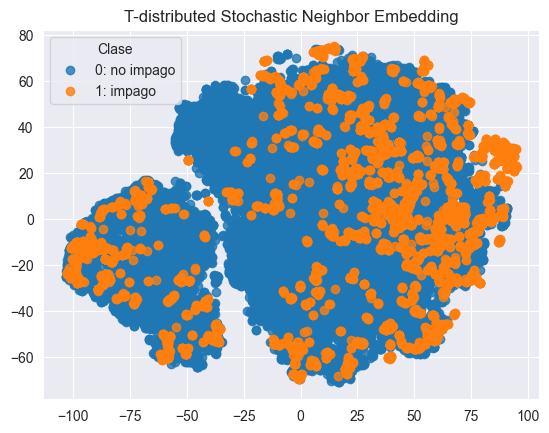

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.116578       0.040627      -0.075173  0.605080 -0.038615   
PCA2  0.044946      -0.030468      -0.265694 -0.103545 -0.262149   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1       0.672786  0.205776  0.001767 -0.014483  0.064469  ... -0.010431   
PCA2       0.114960  0.049696 -0.001238  0.111977 -0.484033  ...  0.032202   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.249301      0.206009    -0.014463    -0.003151     0.002058   
PCA2  -0.072995      0.035207    -0.059318     0.029700     0.005669   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.028708     0.000892    -0.000277     0.002342  
PCA2    -0.023384     0.000233     0.002299    -0.000452  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.21167077 0.17937627]
Sum of explained variance ratio for first two c

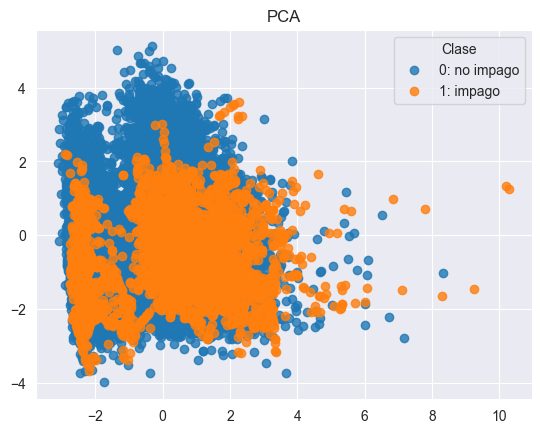

TSNE            TSNE1      TSNE2
0      59.721382  40.702183
1     -23.888334  -7.860065
2      61.910908  19.287254
3     -19.166428   9.986973
4     -52.071106  -3.339547
...          ...        ...
26975  67.907616  -8.616423
26976  69.817825   9.279655
26977  69.815880   9.280156
26978  67.055008 -14.809160
26979  68.149055  -0.827598

[26980 rows x 2 columns]


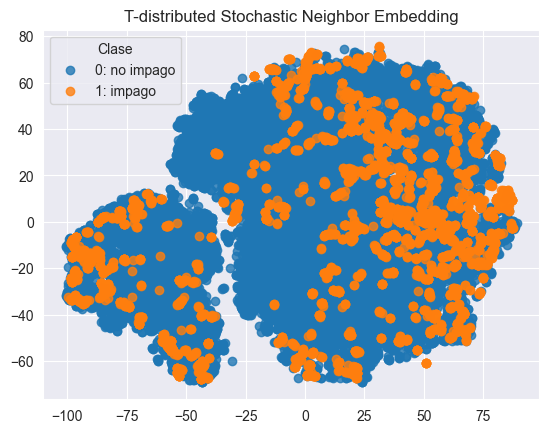

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.121722       0.041134      -0.059747  0.604106 -0.002833   
PCA2  0.041685      -0.022963      -0.240140 -0.074921 -0.256803   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1       0.675296  0.205183  0.001244 -0.035408  0.074917  ... -0.012731   
PCA2       0.148567  0.054700 -0.000965  0.114183 -0.497473  ...  0.033196   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.237295      0.200951    -0.004697    -0.004699     0.000799   
PCA2  -0.084551      0.044546    -0.061617     0.032746     0.006031   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.031091     0.001124    -0.000379     0.001787  
PCA2    -0.022199     0.000062     0.001302    -0.000192  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.21778135 0.17864728]
Sum of explained variance ratio for first two c

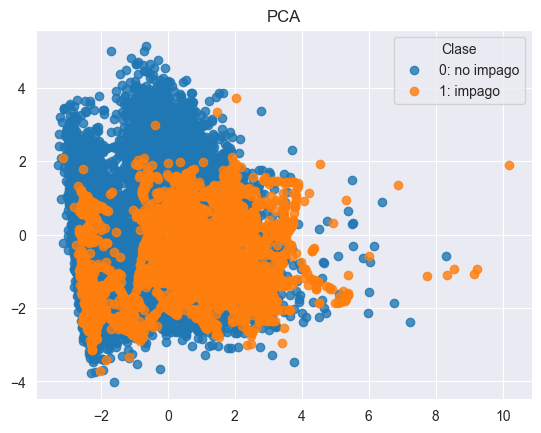

TSNE            TSNE1      TSNE2
0      64.040398  16.115395
1     -26.597689  26.717892
2      57.964027  18.749048
3     -28.136221   8.073604
4     -54.863667   0.063131
...          ...        ...
27221  79.645775  22.940361
27222  31.772327 -10.323281
27223 -36.322857 -63.891026
27224  33.310665  64.066963
27225 -96.912628  -6.013471

[27226 rows x 2 columns]


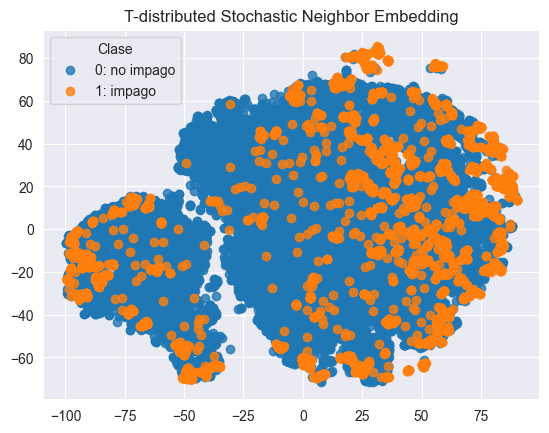

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.046997       0.008398       0.014912  0.320028 -0.024635   
PCA2  0.063524      -0.031141      -0.187794 -0.201886 -0.209964   

      ValorVehículo   Motor_2   Motor_3     Canal   Socioec  ...   Figuras  \
PCA1       0.912905  0.130892  0.015166 -0.010976 -0.009932  ...  0.008836   
PCA2       0.047967  0.013545 -0.000127  0.095744 -0.545882  ...  0.037739   

      Tipo_Moto  Tipo_Turismo  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1  -0.135838      0.122127    -0.010180    -0.004174     0.007538   
PCA2  -0.031504      0.004507    -0.046983     0.027167     0.006031   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.034814     0.001372     0.003381    -0.000837  
PCA2    -0.020412    -0.002239     0.001119    -0.000680  

[2 rows x 23 columns]
Explained variance ratio for first two components:  [0.32084401 0.14321624]
Sum of explained variance ratio for first two c

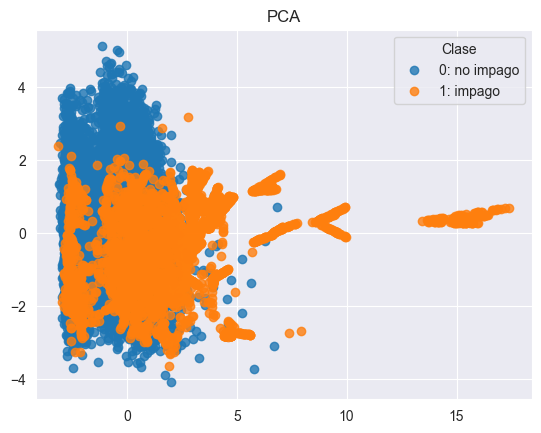

TSNE            TSNE1      TSNE2
0      56.254147  -9.246551
1     -18.826746  39.017109
2      51.341835  -4.471404
3     -13.822891  28.414621
4     -62.743999  13.337592
...          ...        ...
27221  75.384560  54.326733
27222  89.912064  26.639099
27223  81.697838 -30.032093
27224  84.409149 -61.227825
27225  62.231171 -60.007690

[27226 rows x 2 columns]


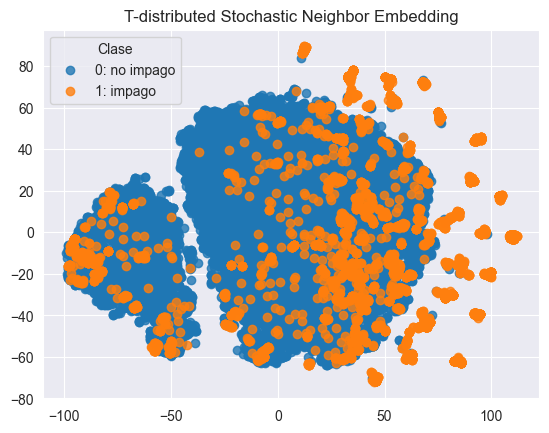

In [15]:
from src.model_utils.dim_reduction import tsne_2d, pca_2d

# Generamos los gráficos de PCA para los diferentes tipos de oversampling
# Generamos los gráficos de PCA para los diferentes tipos de oversampling
pca_2d(X_train, y_train)
tsne_2d(X_train, y_train)

pca_2d(X_train_ro, y_train_ro)
tsne_2d(X_train_ro, y_train_ro)

pca_2d(X_train_sm, y_train_sm)
tsne_2d(X_train_sm, y_train_sm)

pca_2d(X_train_adasyn, y_train_adasyn)
tsne_2d(X_train_adasyn, y_train_adasyn)

pca_2d(X_train_bsm, y_train_bsm)
tsne_2d(X_train_bsm, y_train_bsm)

pca_2d(X_train_svmsm, y_train_svmsm)
tsne_2d(X_train_svmsm, y_train_svmsm)




A continuación vamos a entrenar los modelos y evaluarlos con los diferentes conjuntos oversampleados

[LogisticRegression] Accuracy train: 0.8635 | test: 0.8683
[LogisticRegression] Balanced Acc train: 0.7356 | test: 0.7489
[LogisticRegression] Precision(1): 0.1318 | Recall(1): 0.6221 | F1(1): 0.2175
[LogisticRegression] Confusion matrix (test):
[[4968  705]
 [  65  107]]


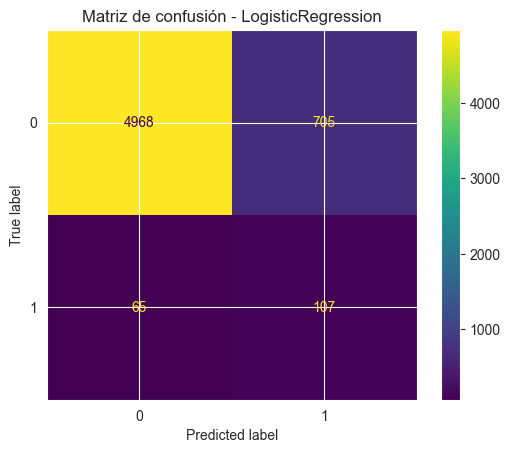

AUC-ROC (train): 0.8361
AUC-ROC (test) : 0.8357
PR-AUC  (train): 0.2453
PR-AUC  (test) : 0.3114
[LogisticRegression] Accuracy train: 0.8501 | test: 0.8549
[LogisticRegression] Balanced Acc train: 0.7449 | test: 0.7449
[LogisticRegression] Precision(1): 0.1211 | Recall(1): 0.6279 | F1(1): 0.2030
[LogisticRegression] Confusion matrix (test):
[[4889  784]
 [  64  108]]


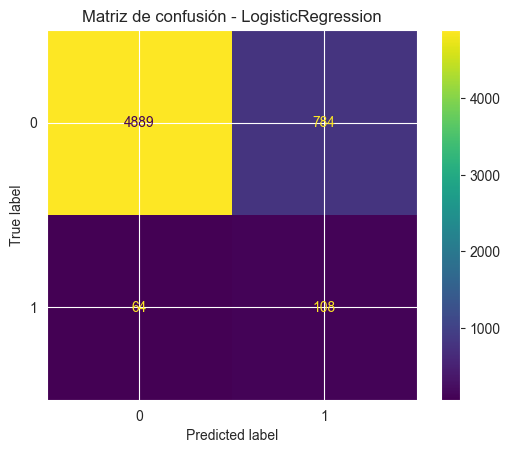

AUC-ROC (train): 0.8352
AUC-ROC (test) : 0.8371
PR-AUC  (train): 0.2669
PR-AUC  (test) : 0.3390
[LogisticRegression] Accuracy train: 0.8569 | test: 0.8624
[LogisticRegression] Balanced Acc train: 0.7428 | test: 0.7487
[LogisticRegression] Precision(1): 0.1274 | Recall(1): 0.6279 | F1(1): 0.2118
[LogisticRegression] Confusion matrix (test):
[[4933  740]
 [  64  108]]


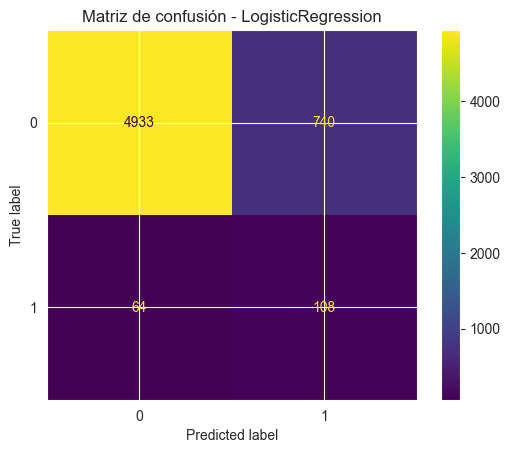

AUC-ROC (train): 0.8360
AUC-ROC (test) : 0.8379
PR-AUC  (train): 0.2596
PR-AUC  (test) : 0.3280
[LogisticRegression] Accuracy train: 0.8490 | test: 0.8536
[LogisticRegression] Balanced Acc train: 0.7486 | test: 0.7526
[LogisticRegression] Precision(1): 0.1225 | Recall(1): 0.6453 | F1(1): 0.2059
[LogisticRegression] Confusion matrix (test):
[[4878  795]
 [  61  111]]


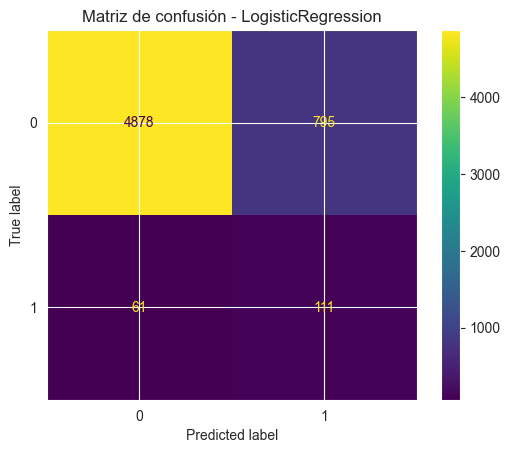

AUC-ROC (train): 0.8364
AUC-ROC (test) : 0.8387
PR-AUC  (train): 0.2573
PR-AUC  (test) : 0.3284
[LogisticRegression] Accuracy train: 0.8748 | test: 0.8794
[LogisticRegression] Balanced Acc train: 0.7379 | test: 0.7434
[LogisticRegression] Precision(1): 0.1394 | Recall(1): 0.5988 | F1(1): 0.2261
[LogisticRegression] Confusion matrix (test):
[[5037  636]
 [  69  103]]


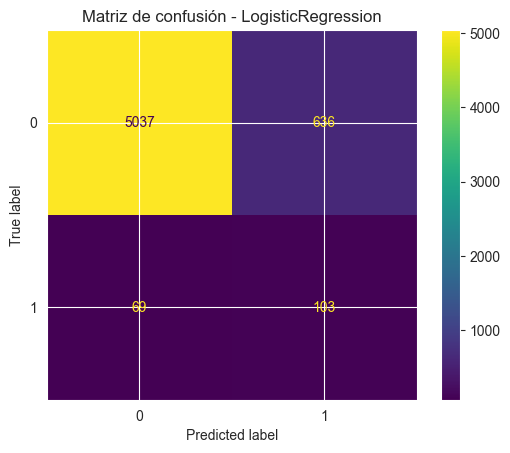

AUC-ROC (train): 0.8367
AUC-ROC (test) : 0.8386
PR-AUC  (train): 0.2552
PR-AUC  (test) : 0.3264
[LogisticRegression] Accuracy train: 0.8790 | test: 0.8845
[LogisticRegression] Balanced Acc train: 0.7344 | test: 0.7404
[LogisticRegression] Precision(1): 0.1433 | Recall(1): 0.5872 | F1(1): 0.2303
[LogisticRegression] Confusion matrix (test):
[[5069  604]
 [  71  101]]


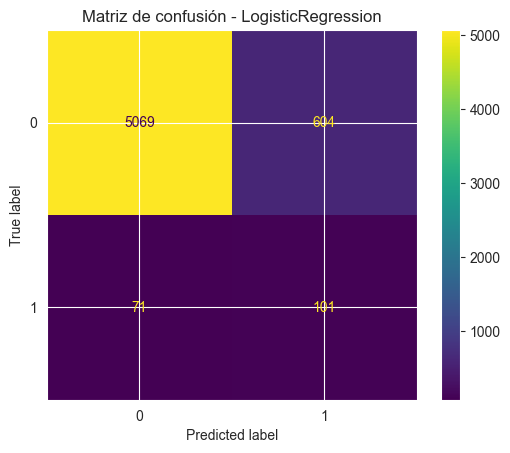

AUC-ROC (train): 0.8365
AUC-ROC (test) : 0.8378
PR-AUC  (train): 0.2513
PR-AUC  (test) : 0.3222
[LogisticRegression] Accuracy train: 0.8716 | test: 0.8784
[LogisticRegression] Balanced Acc train: 0.7398 | test: 0.7400
[LogisticRegression] Precision(1): 0.1373 | Recall(1): 0.5930 | F1(1): 0.2230
[LogisticRegression] Confusion matrix (test):
[[5032  641]
 [  70  102]]


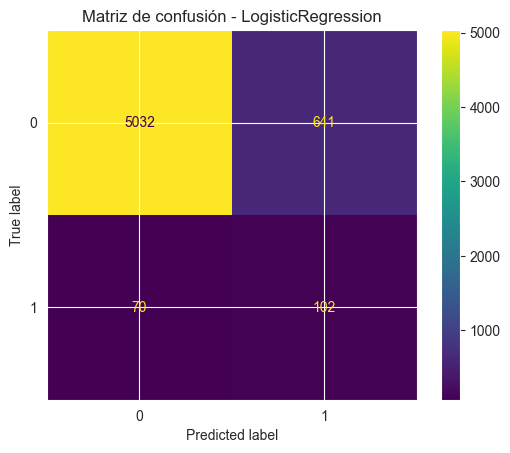

AUC-ROC (train): 0.8361
AUC-ROC (test) : 0.8366
PR-AUC  (train): 0.2486
PR-AUC  (test) : 0.3184
[LogisticRegression] Accuracy train: 0.8741 | test: 0.8797
[LogisticRegression] Balanced Acc train: 0.7389 | test: 0.7464
[LogisticRegression] Precision(1): 0.1407 | Recall(1): 0.6047 | F1(1): 0.2283
[LogisticRegression] Confusion matrix (test):
[[5038  635]
 [  68  104]]


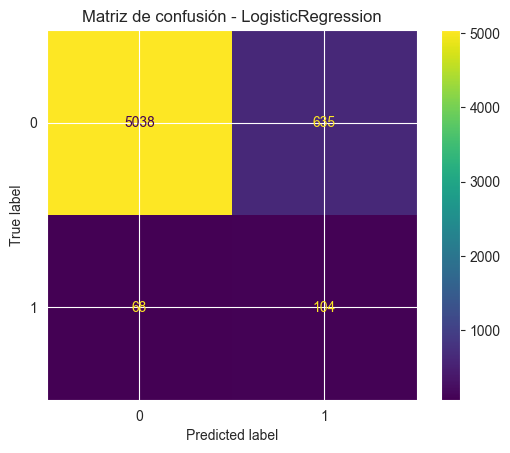

AUC-ROC (train): 0.8340
AUC-ROC (test) : 0.8362
PR-AUC  (train): 0.2671
PR-AUC  (test) : 0.3319
[LogisticRegression] Accuracy train: 0.8332 | test: 0.8397
[LogisticRegression] Balanced Acc train: 0.7411 | test: 0.7511
[LogisticRegression] Precision(1): 0.1140 | Recall(1): 0.6570 | F1(1): 0.1943
[LogisticRegression] Confusion matrix (test):
[[4795  878]
 [  59  113]]


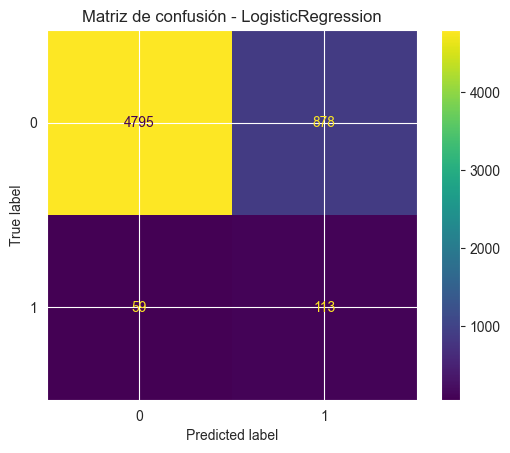

AUC-ROC (train): 0.8291
AUC-ROC (test) : 0.8292
PR-AUC  (train): 0.2421
PR-AUC  (test) : 0.3006
[LogisticRegression] Accuracy train: 0.8916 | test: 0.8970
[LogisticRegression] Balanced Acc train: 0.7126 | test: 0.7299
[LogisticRegression] Precision(1): 0.1532 | Recall(1): 0.5523 | F1(1): 0.2399
[LogisticRegression] Confusion matrix (test):
[[5148  525]
 [  77   95]]


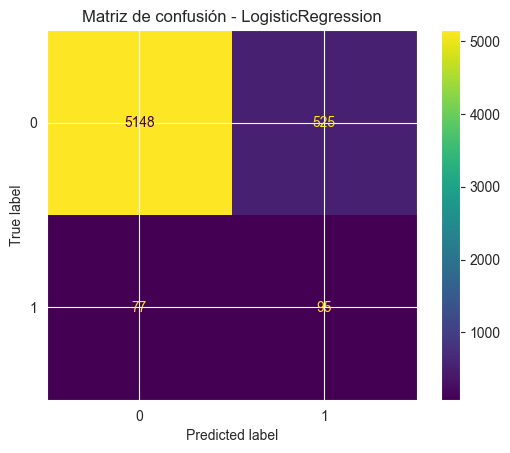

AUC-ROC (train): 0.8253
AUC-ROC (test) : 0.8253
PR-AUC  (train): 0.2230
PR-AUC  (test) : 0.2784
[LogisticRegression] Accuracy train: 0.8980 | test: 0.9042
[LogisticRegression] Balanced Acc train: 0.7082 | test: 0.7195
[LogisticRegression] Precision(1): 0.1585 | Recall(1): 0.5233 | F1(1): 0.2432
[LogisticRegression] Confusion matrix (test):
[[5195  478]
 [  82   90]]


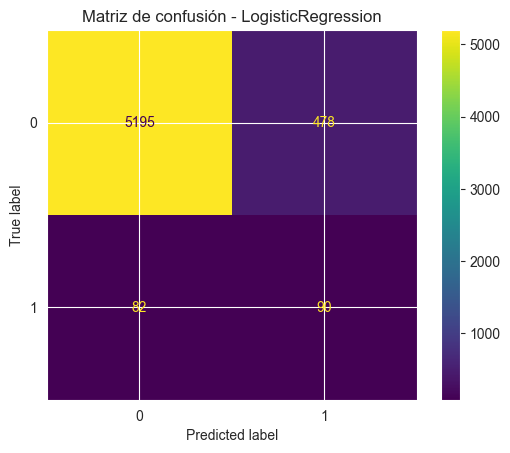

AUC-ROC (train): 0.8241
AUC-ROC (test) : 0.8241
PR-AUC  (train): 0.2152
PR-AUC  (test) : 0.2679
[LogisticRegression] Accuracy train: 0.8943 | test: 0.8992
[LogisticRegression] Balanced Acc train: 0.7105 | test: 0.7169
[LogisticRegression] Precision(1): 0.1508 | Recall(1): 0.5233 | F1(1): 0.2341
[LogisticRegression] Confusion matrix (test):
[[5166  507]
 [  82   90]]


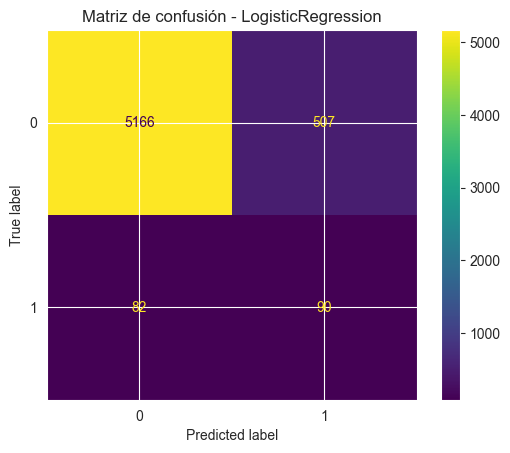

AUC-ROC (train): 0.8241
AUC-ROC (test) : 0.8241
PR-AUC  (train): 0.2121
PR-AUC  (test) : 0.2659
[LogisticRegression] Accuracy train: 0.8912 | test: 0.8967
[LogisticRegression] Balanced Acc train: 0.7110 | test: 0.7241
[LogisticRegression] Precision(1): 0.1505 | Recall(1): 0.5407 | F1(1): 0.2354
[LogisticRegression] Confusion matrix (test):
[[5148  525]
 [  79   93]]


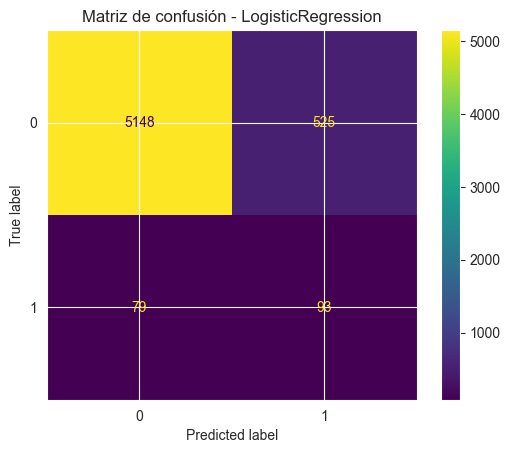

AUC-ROC (train): 0.8234
AUC-ROC (test) : 0.8233
PR-AUC  (train): 0.2089
PR-AUC  (test) : 0.2612
[LogisticRegression] Accuracy train: 0.8793 | test: 0.8861
[LogisticRegression] Balanced Acc train: 0.7416 | test: 0.7496
[LogisticRegression] Precision(1): 0.1481 | Recall(1): 0.6047 | F1(1): 0.2380
[LogisticRegression] Confusion matrix (test):
[[5075  598]
 [  68  104]]


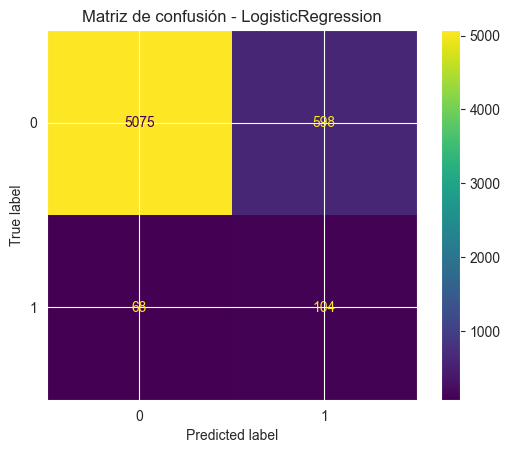

AUC-ROC (train): 0.8351
AUC-ROC (test) : 0.8391
PR-AUC  (train): 0.2682
PR-AUC  (test) : 0.3266
[LogisticRegression] Accuracy train: 0.8927 | test: 0.9018
[LogisticRegression] Balanced Acc train: 0.7316 | test: 0.7352
[LogisticRegression] Precision(1): 0.1616 | Recall(1): 0.5581 | F1(1): 0.2507
[LogisticRegression] Confusion matrix (test):
[[5175  498]
 [  76   96]]


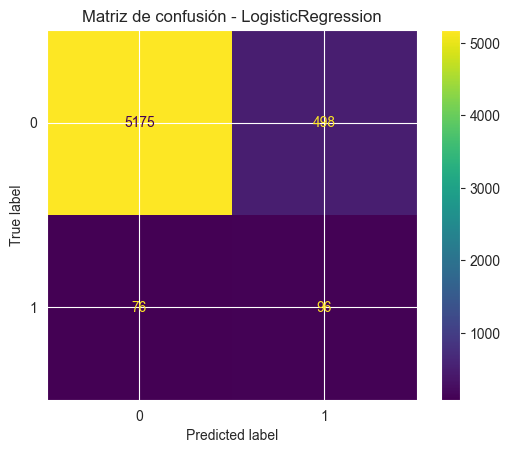

AUC-ROC (train): 0.8343
AUC-ROC (test) : 0.8385
PR-AUC  (train): 0.2562
PR-AUC  (test) : 0.3070
[LogisticRegression] Accuracy train: 0.8982 | test: 0.9059
[LogisticRegression] Balanced Acc train: 0.7260 | test: 0.7288
[LogisticRegression] Precision(1): 0.1649 | Recall(1): 0.5407 | F1(1): 0.2527
[LogisticRegression] Confusion matrix (test):
[[5202  471]
 [  79   93]]


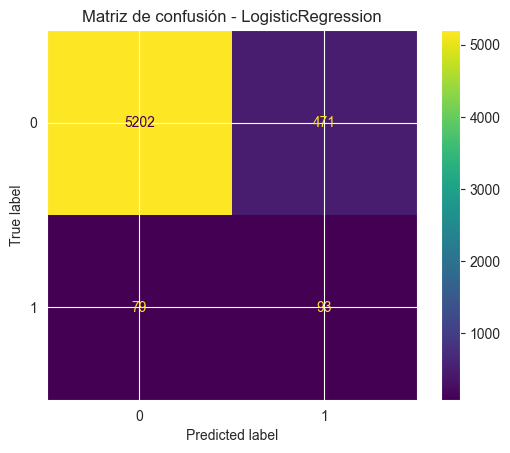

AUC-ROC (train): 0.8325
AUC-ROC (test) : 0.8366
PR-AUC  (train): 0.2411
PR-AUC  (test) : 0.2888
[LogisticRegression] Accuracy train: 0.8968 | test: 0.9047
[LogisticRegression] Balanced Acc train: 0.7231 | test: 0.7339
[LogisticRegression] Precision(1): 0.1652 | Recall(1): 0.5523 | F1(1): 0.2544
[LogisticRegression] Confusion matrix (test):
[[5193  480]
 [  77   95]]


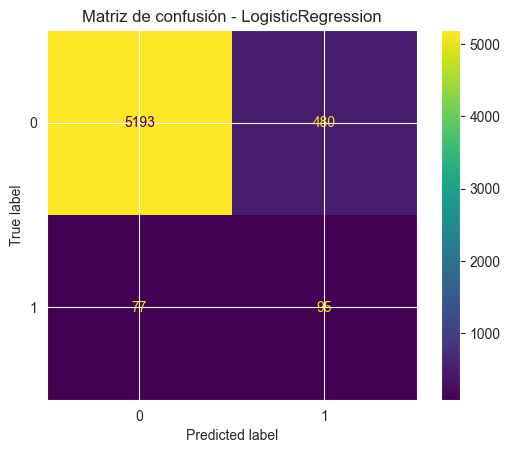

AUC-ROC (train): 0.8323
AUC-ROC (test) : 0.8364
PR-AUC  (train): 0.2360
PR-AUC  (test) : 0.2826
[LogisticRegression] Accuracy train: 0.8872 | test: 0.8953
[LogisticRegression] Balanced Acc train: 0.7302 | test: 0.7346
[LogisticRegression] Precision(1): 0.1530 | Recall(1): 0.5640 | F1(1): 0.2407
[LogisticRegression] Confusion matrix (test):
[[5136  537]
 [  75   97]]


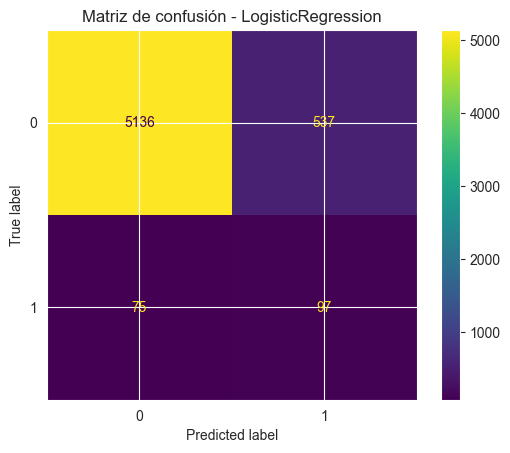

AUC-ROC (train): 0.8320
AUC-ROC (test) : 0.8359
PR-AUC  (train): 0.2319
PR-AUC  (test) : 0.2749
[LogisticRegression] Accuracy train: 0.8886 | test: 0.8963
[LogisticRegression] Balanced Acc train: 0.7273 | test: 0.7324
[LogisticRegression] Precision(1): 0.1534 | Recall(1): 0.5581 | F1(1): 0.2406
[LogisticRegression] Confusion matrix (test):
[[5143  530]
 [  76   96]]


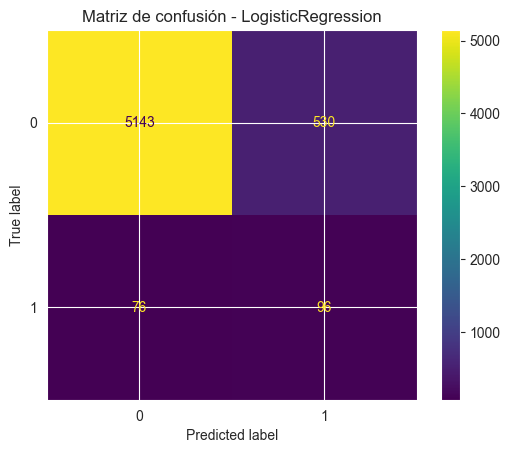

AUC-ROC (train): 0.8316
AUC-ROC (test) : 0.8357
PR-AUC  (train): 0.2304
PR-AUC  (test) : 0.2737
[LogisticRegression] Accuracy train: 0.9366 | test: 0.9442
[LogisticRegression] Balanced Acc train: 0.6836 | test: 0.6978
[LogisticRegression] Precision(1): 0.2467 | Recall(1): 0.4360 | F1(1): 0.3151
[LogisticRegression] Confusion matrix (test):
[[5444  229]
 [  97   75]]


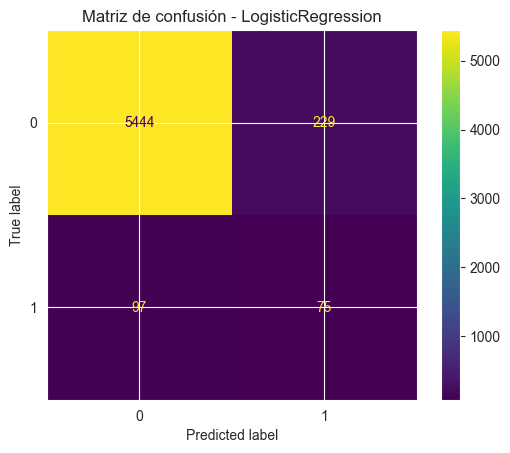

AUC-ROC (train): 0.8311
AUC-ROC (test) : 0.8327
PR-AUC  (train): 0.2742
PR-AUC  (test) : 0.3565
[LogisticRegression] Accuracy train: 0.9065 | test: 0.9122
[LogisticRegression] Balanced Acc train: 0.7119 | test: 0.7152
[LogisticRegression] Precision(1): 0.1689 | Recall(1): 0.5058 | F1(1): 0.2533
[LogisticRegression] Confusion matrix (test):
[[5245  428]
 [  85   87]]


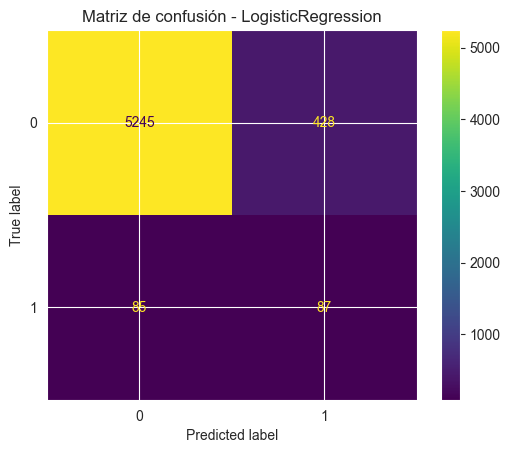

AUC-ROC (train): 0.8305
AUC-ROC (test) : 0.8319
PR-AUC  (train): 0.2652
PR-AUC  (test) : 0.3449
[LogisticRegression] Accuracy train: 0.9029 | test: 0.9093
[LogisticRegression] Balanced Acc train: 0.7171 | test: 0.7193
[LogisticRegression] Precision(1): 0.1660 | Recall(1): 0.5174 | F1(1): 0.2514
[LogisticRegression] Confusion matrix (test):
[[5226  447]
 [  83   89]]


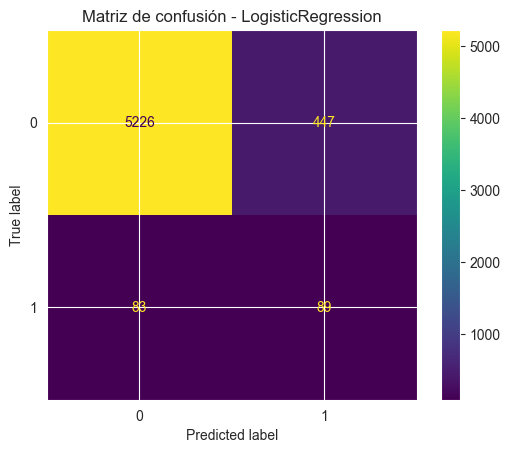

AUC-ROC (train): 0.8300
AUC-ROC (test) : 0.8321
PR-AUC  (train): 0.2604
PR-AUC  (test) : 0.3364
[LogisticRegression] Accuracy train: 0.9232 | test: 0.9304
[LogisticRegression] Balanced Acc train: 0.6951 | test: 0.7217
[LogisticRegression] Precision(1): 0.2113 | Recall(1): 0.5000 | F1(1): 0.2971
[LogisticRegression] Confusion matrix (test):
[[5352  321]
 [  86   86]]


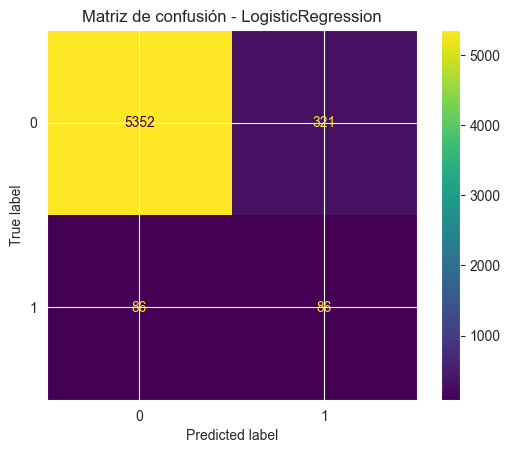

AUC-ROC (train): 0.8299
AUC-ROC (test) : 0.8319
PR-AUC  (train): 0.2559
PR-AUC  (test) : 0.3274
[LogisticRegression] Accuracy train: 0.9147 | test: 0.9206
[LogisticRegression] Balanced Acc train: 0.7055 | test: 0.7195
[LogisticRegression] Precision(1): 0.1867 | Recall(1): 0.5058 | F1(1): 0.2727
[LogisticRegression] Confusion matrix (test):
[[5294  379]
 [  85   87]]


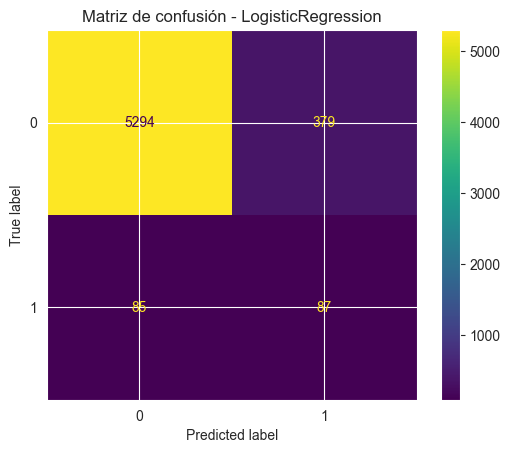

AUC-ROC (train): 0.8303
AUC-ROC (test) : 0.8326
PR-AUC  (train): 0.2545
PR-AUC  (test) : 0.3249
[LogisticRegression] Accuracy train: 0.9139 | test: 0.9187
[LogisticRegression] Balanced Acc train: 0.7051 | test: 0.7214
[LogisticRegression] Precision(1): 0.1837 | Recall(1): 0.5116 | F1(1): 0.2704
[LogisticRegression] Confusion matrix (test):
[[5282  391]
 [  84   88]]


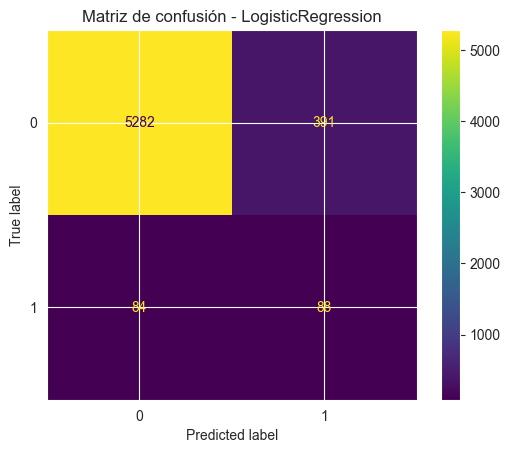

AUC-ROC (train): 0.8303
AUC-ROC (test) : 0.8326
PR-AUC  (train): 0.2507
PR-AUC  (test) : 0.3193
[LogisticRegression] Accuracy train: 0.8991 | test: 0.9050
[LogisticRegression] Balanced Acc train: 0.7236 | test: 0.7453
[LogisticRegression] Precision(1): 0.1704 | Recall(1): 0.5756 | F1(1): 0.2629
[LogisticRegression] Confusion matrix (test):
[[5191  482]
 [  73   99]]


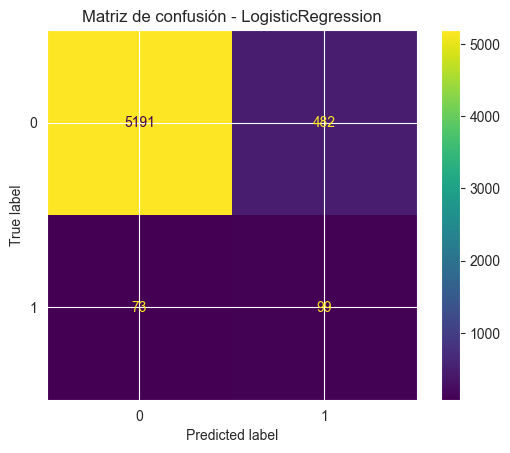

AUC-ROC (train): 0.8337
AUC-ROC (test) : 0.8344
PR-AUC  (train): 0.2585
PR-AUC  (test) : 0.3177
[LogisticRegression] Accuracy train: 0.9004 | test: 0.9061
[LogisticRegression] Balanced Acc train: 0.7158 | test: 0.7317
[LogisticRegression] Precision(1): 0.1664 | Recall(1): 0.5465 | F1(1): 0.2551
[LogisticRegression] Confusion matrix (test):
[[5202  471]
 [  78   94]]


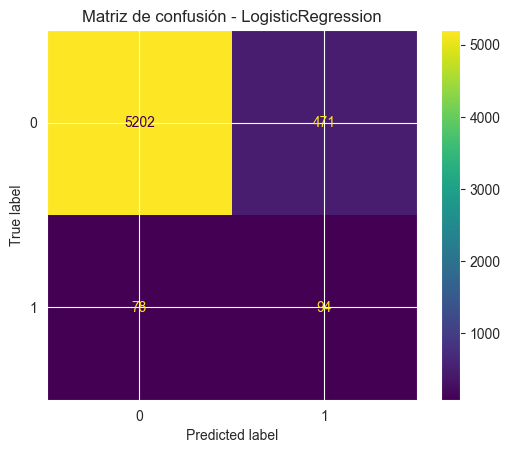

AUC-ROC (train): 0.8301
AUC-ROC (test) : 0.8308
PR-AUC  (train): 0.2356
PR-AUC  (test) : 0.2875
[LogisticRegression] Accuracy train: 0.8964 | test: 0.9008
[LogisticRegression] Balanced Acc train: 0.7109 | test: 0.7149
[LogisticRegression] Precision(1): 0.1519 | Recall(1): 0.5174 | F1(1): 0.2348
[LogisticRegression] Confusion matrix (test):
[[5176  497]
 [  83   89]]


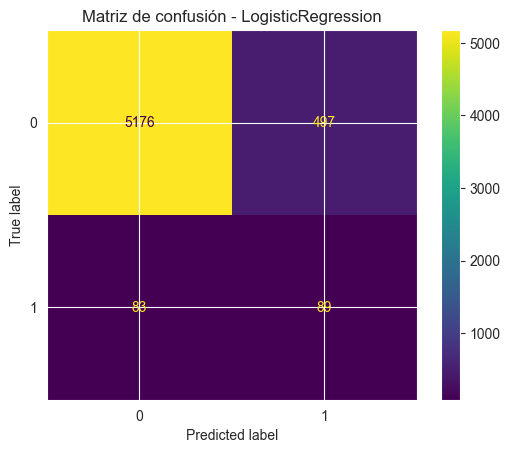

AUC-ROC (train): 0.8255
AUC-ROC (test) : 0.8257
PR-AUC  (train): 0.2182
PR-AUC  (test) : 0.2701
[LogisticRegression] Accuracy train: 0.8943 | test: 0.8991
[LogisticRegression] Balanced Acc train: 0.7084 | test: 0.7112
[LogisticRegression] Precision(1): 0.1481 | Recall(1): 0.5116 | F1(1): 0.2298
[LogisticRegression] Confusion matrix (test):
[[5167  506]
 [  84   88]]


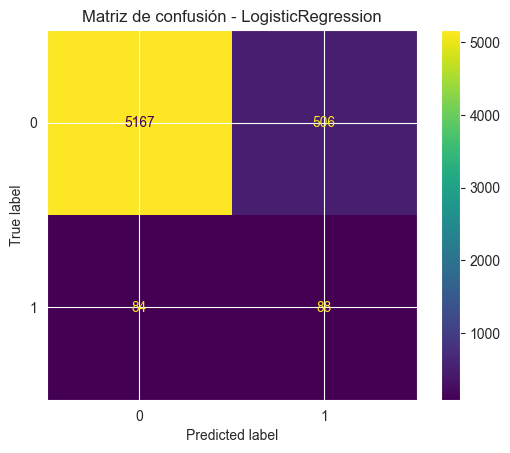

AUC-ROC (train): 0.8240
AUC-ROC (test) : 0.8239
PR-AUC  (train): 0.2101
PR-AUC  (test) : 0.2621
[LogisticRegression] Accuracy train: 0.8820 | test: 0.8886
[LogisticRegression] Balanced Acc train: 0.7112 | test: 0.7228
[LogisticRegression] Precision(1): 0.1409 | Recall(1): 0.5465 | F1(1): 0.2241
[LogisticRegression] Confusion matrix (test):
[[5100  573]
 [  78   94]]


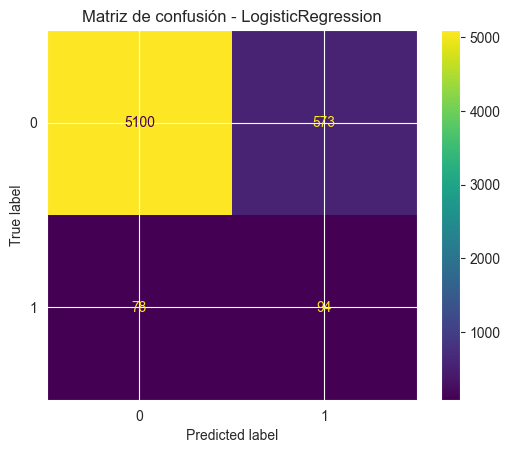

AUC-ROC (train): 0.8230
AUC-ROC (test) : 0.8225
PR-AUC  (train): 0.2059
PR-AUC  (test) : 0.2572
[LogisticRegression] Accuracy train: 0.8895 | test: 0.8951
[LogisticRegression] Balanced Acc train: 0.7080 | test: 0.7064
[LogisticRegression] Precision(1): 0.1415 | Recall(1): 0.5058 | F1(1): 0.2211
[LogisticRegression] Confusion matrix (test):
[[5145  528]
 [  85   87]]


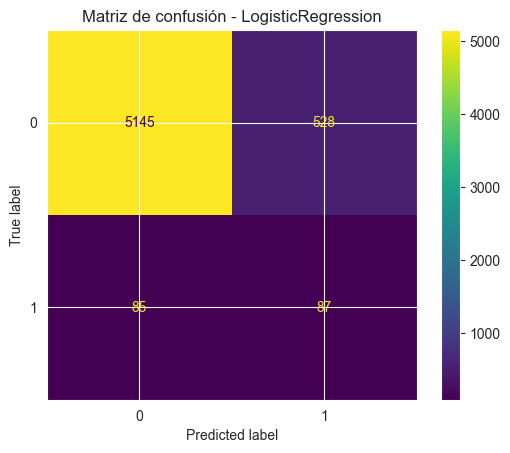

AUC-ROC (train): 0.8225
AUC-ROC (test) : 0.8219
PR-AUC  (train): 0.2033
PR-AUC  (test) : 0.2532
[LogisticRegression] Accuracy train: 0.8631 | test: 0.8676
[LogisticRegression] Balanced Acc train: 0.7354 | test: 0.7486
[LogisticRegression] Precision(1): 0.1311 | Recall(1): 0.6221 | F1(1): 0.2166
[LogisticRegression] Confusion matrix (test):
[[4964  709]
 [  65  107]]


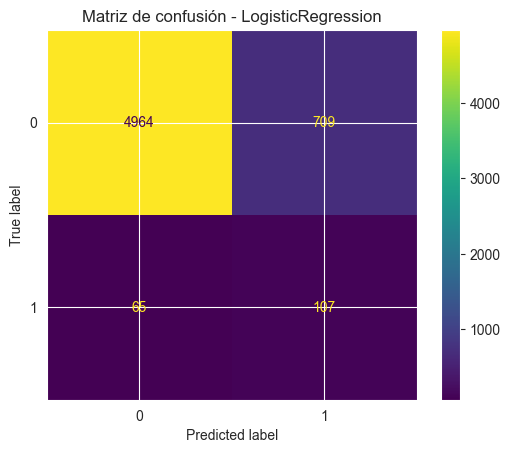

AUC-ROC (train): 0.8361
AUC-ROC (test) : 0.8356
PR-AUC  (train): 0.2452
PR-AUC  (test) : 0.3113
[LogisticRegression] Accuracy train: 0.8473 | test: 0.8520
[LogisticRegression] Balanced Acc train: 0.7449 | test: 0.7462
[LogisticRegression] Precision(1): 0.1196 | Recall(1): 0.6337 | F1(1): 0.2013
[LogisticRegression] Confusion matrix (test):
[[4871  802]
 [  63  109]]


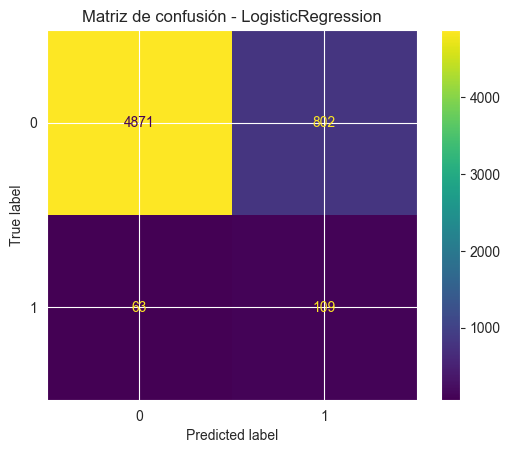

AUC-ROC (train): 0.8353
AUC-ROC (test) : 0.8374
PR-AUC  (train): 0.2673
PR-AUC  (test) : 0.3384
[LogisticRegression] Accuracy train: 0.8567 | test: 0.8618
[LogisticRegression] Balanced Acc train: 0.7427 | test: 0.7456
[LogisticRegression] Precision(1): 0.1259 | Recall(1): 0.6221 | F1(1): 0.2094
[LogisticRegression] Confusion matrix (test):
[[4930  743]
 [  65  107]]


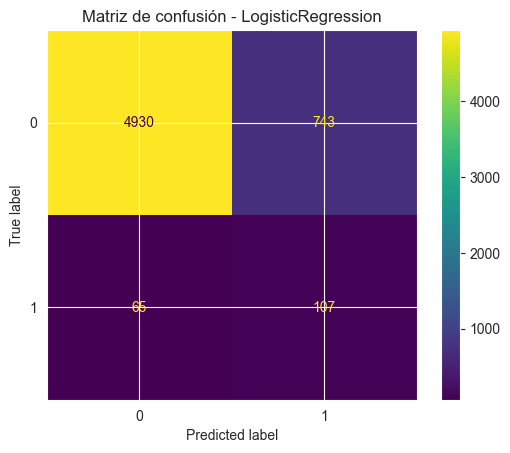

AUC-ROC (train): 0.8359
AUC-ROC (test) : 0.8378
PR-AUC  (train): 0.2599
PR-AUC  (test) : 0.3281
[LogisticRegression] Accuracy train: 0.8498 | test: 0.8542
[LogisticRegression] Balanced Acc train: 0.7476 | test: 0.7530
[LogisticRegression] Precision(1): 0.1231 | Recall(1): 0.6453 | F1(1): 0.2067
[LogisticRegression] Confusion matrix (test):
[[4882  791]
 [  61  111]]


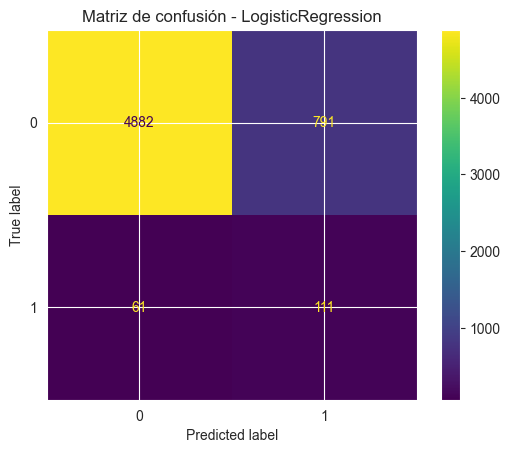

AUC-ROC (train): 0.8364
AUC-ROC (test) : 0.8388
PR-AUC  (train): 0.2572
PR-AUC  (test) : 0.3285
[LogisticRegression] Accuracy train: 0.8761 | test: 0.8809
[LogisticRegression] Balanced Acc train: 0.7371 | test: 0.7442
[LogisticRegression] Precision(1): 0.1411 | Recall(1): 0.5988 | F1(1): 0.2284
[LogisticRegression] Confusion matrix (test):
[[5046  627]
 [  69  103]]


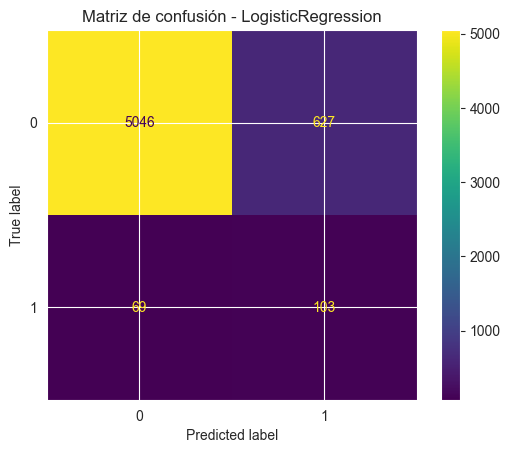

AUC-ROC (train): 0.8367
AUC-ROC (test) : 0.8387
PR-AUC  (train): 0.2548
PR-AUC  (test) : 0.3253
[LogisticRegression] Accuracy train: 0.8726 | test: 0.8787
[LogisticRegression] Balanced Acc train: 0.7368 | test: 0.7486
[LogisticRegression] Precision(1): 0.1406 | Recall(1): 0.6105 | F1(1): 0.2285
[LogisticRegression] Confusion matrix (test):
[[5031  642]
 [  67  105]]


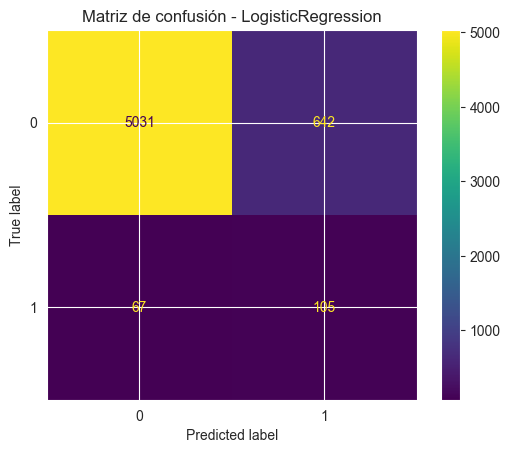

AUC-ROC (train): 0.8364
AUC-ROC (test) : 0.8378
PR-AUC  (train): 0.2514
PR-AUC  (test) : 0.3224
[LogisticRegression] Accuracy train: 0.8716 | test: 0.8780
[LogisticRegression] Balanced Acc train: 0.7398 | test: 0.7398
[LogisticRegression] Precision(1): 0.1369 | Recall(1): 0.5930 | F1(1): 0.2225
[LogisticRegression] Confusion matrix (test):
[[5030  643]
 [  70  102]]


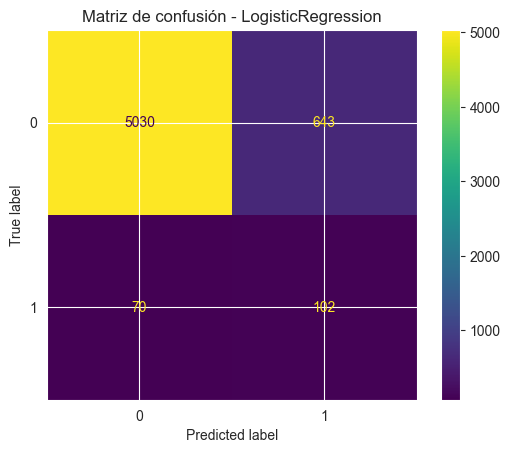

AUC-ROC (train): 0.8360
AUC-ROC (test) : 0.8366
PR-AUC  (train): 0.2486
PR-AUC  (test) : 0.3192
[LogisticRegression] Accuracy train: 0.8679 | test: 0.8743
[LogisticRegression] Balanced Acc train: 0.7428 | test: 0.7520
[LogisticRegression] Precision(1): 0.1377 | Recall(1): 0.6221 | F1(1): 0.2255
[LogisticRegression] Confusion matrix (test):
[[5003  670]
 [  65  107]]


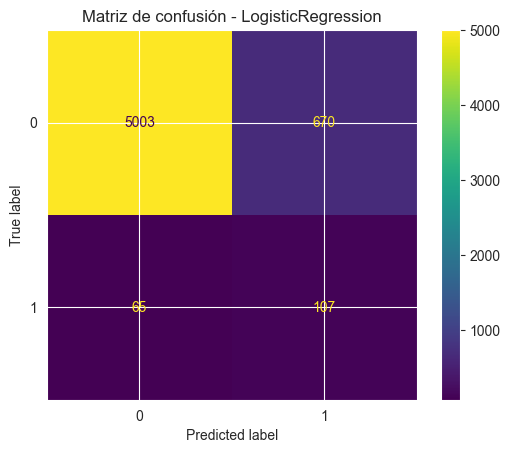

AUC-ROC (train): 0.8340
AUC-ROC (test) : 0.8360
PR-AUC  (train): 0.2664
PR-AUC  (test) : 0.3317
[LogisticRegression] Accuracy train: 0.8326 | test: 0.8393
[LogisticRegression] Balanced Acc train: 0.7416 | test: 0.7509
[LogisticRegression] Precision(1): 0.1138 | Recall(1): 0.6570 | F1(1): 0.1940
[LogisticRegression] Confusion matrix (test):
[[4793  880]
 [  59  113]]


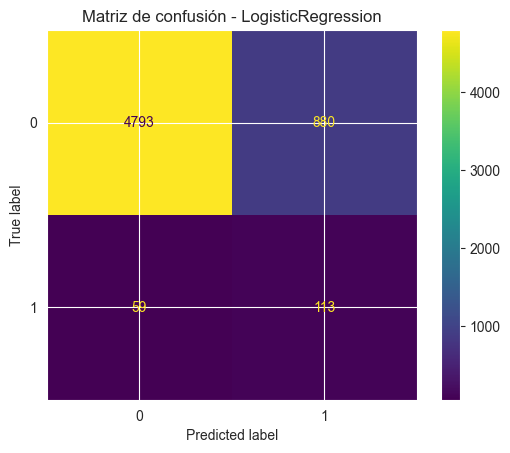

AUC-ROC (train): 0.8291
AUC-ROC (test) : 0.8293
PR-AUC  (train): 0.2419
PR-AUC  (test) : 0.3010
[LogisticRegression] Accuracy train: 0.8917 | test: 0.8973
[LogisticRegression] Balanced Acc train: 0.7127 | test: 0.7301
[LogisticRegression] Precision(1): 0.1537 | Recall(1): 0.5523 | F1(1): 0.2405
[LogisticRegression] Confusion matrix (test):
[[5150  523]
 [  77   95]]


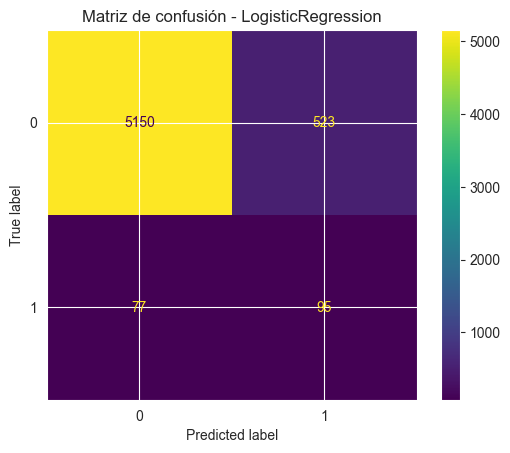

AUC-ROC (train): 0.8253
AUC-ROC (test) : 0.8253
PR-AUC  (train): 0.2231
PR-AUC  (test) : 0.2782
[LogisticRegression] Accuracy train: 0.8985 | test: 0.9047
[LogisticRegression] Balanced Acc train: 0.7070 | test: 0.7169
[LogisticRegression] Precision(1): 0.1581 | Recall(1): 0.5174 | F1(1): 0.2422
[LogisticRegression] Confusion matrix (test):
[[5199  474]
 [  83   89]]


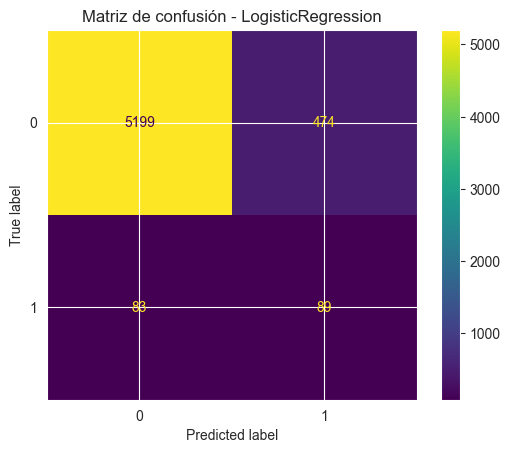

AUC-ROC (train): 0.8242
AUC-ROC (test) : 0.8241
PR-AUC  (train): 0.2151
PR-AUC  (test) : 0.2680
[LogisticRegression] Accuracy train: 0.8929 | test: 0.8982
[LogisticRegression] Balanced Acc train: 0.7119 | test: 0.7192
[LogisticRegression] Precision(1): 0.1504 | Recall(1): 0.5291 | F1(1): 0.2342
[LogisticRegression] Confusion matrix (test):
[[5159  514]
 [  81   91]]


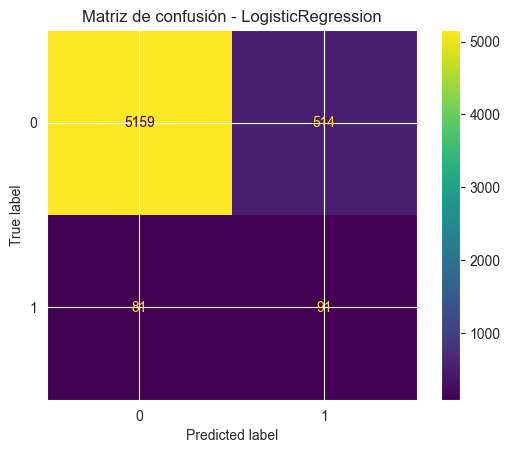

AUC-ROC (train): 0.8240
AUC-ROC (test) : 0.8241
PR-AUC  (train): 0.2117
PR-AUC  (test) : 0.2664
[LogisticRegression] Accuracy train: 0.8906 | test: 0.8963
[LogisticRegression] Balanced Acc train: 0.7115 | test: 0.7239
[LogisticRegression] Precision(1): 0.1500 | Recall(1): 0.5407 | F1(1): 0.2348
[LogisticRegression] Confusion matrix (test):
[[5146  527]
 [  79   93]]


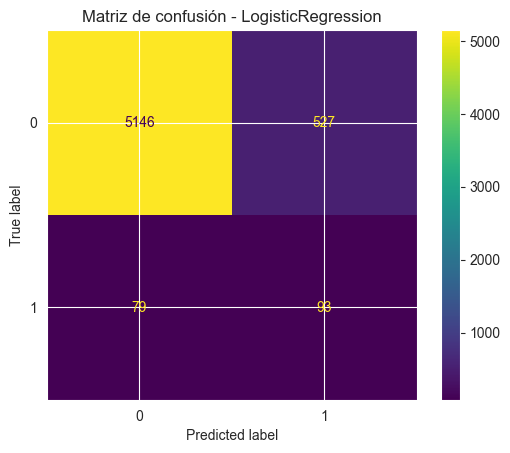

AUC-ROC (train): 0.8234
AUC-ROC (test) : 0.8232
PR-AUC  (train): 0.2088
PR-AUC  (test) : 0.2611
[LogisticRegression] Accuracy train: 0.8926 | test: 0.9013
[LogisticRegression] Balanced Acc train: 0.7386 | test: 0.7462
[LogisticRegression] Precision(1): 0.1653 | Recall(1): 0.5814 | F1(1): 0.2574
[LogisticRegression] Confusion matrix (test):
[[5168  505]
 [  72  100]]


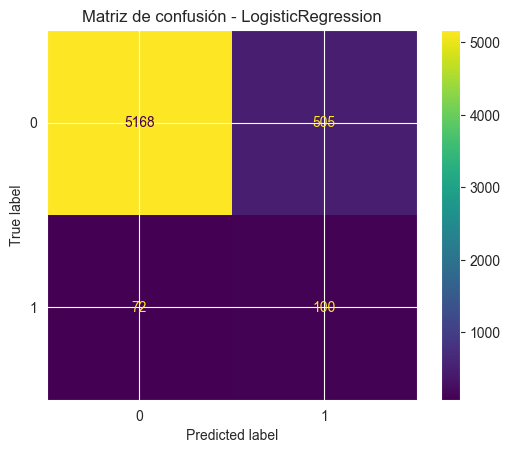

AUC-ROC (train): 0.8351
AUC-ROC (test) : 0.8390
PR-AUC  (train): 0.2680
PR-AUC  (test) : 0.3276
[LogisticRegression] Accuracy train: 0.8876 | test: 0.8985
[LogisticRegression] Balanced Acc train: 0.7346 | test: 0.7448
[LogisticRegression] Precision(1): 0.1610 | Recall(1): 0.5814 | F1(1): 0.2522
[LogisticRegression] Confusion matrix (test):
[[5152  521]
 [  72  100]]


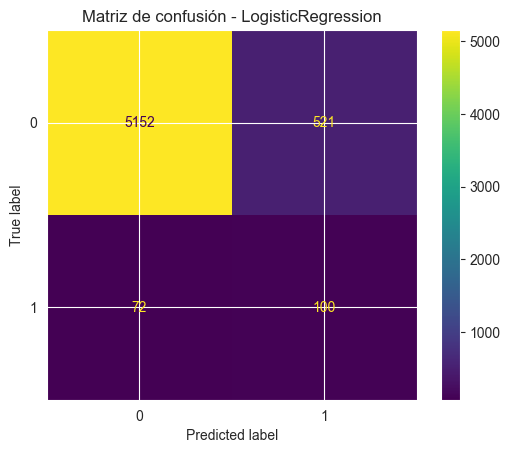

AUC-ROC (train): 0.8343
AUC-ROC (test) : 0.8385
PR-AUC  (train): 0.2561
PR-AUC  (test) : 0.3065
[LogisticRegression] Accuracy train: 0.8949 | test: 0.9040
[LogisticRegression] Balanced Acc train: 0.7257 | test: 0.7335
[LogisticRegression] Precision(1): 0.1641 | Recall(1): 0.5523 | F1(1): 0.2530
[LogisticRegression] Confusion matrix (test):
[[5189  484]
 [  77   95]]


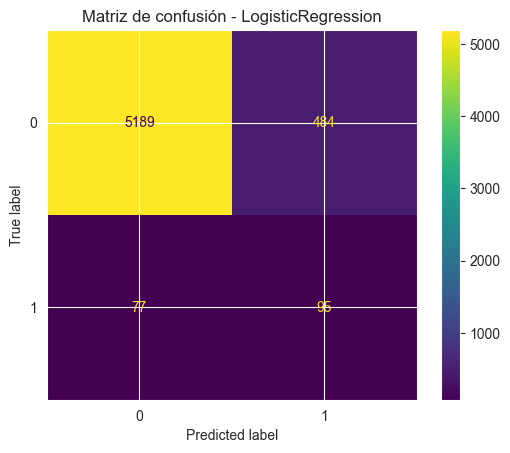

AUC-ROC (train): 0.8326
AUC-ROC (test) : 0.8366
PR-AUC  (train): 0.2412
PR-AUC  (test) : 0.2888
[LogisticRegression] Accuracy train: 0.8922 | test: 0.9015
[LogisticRegression] Balanced Acc train: 0.7285 | test: 0.7378
[LogisticRegression] Precision(1): 0.1622 | Recall(1): 0.5640 | F1(1): 0.2519
[LogisticRegression] Confusion matrix (test):
[[5172  501]
 [  75   97]]


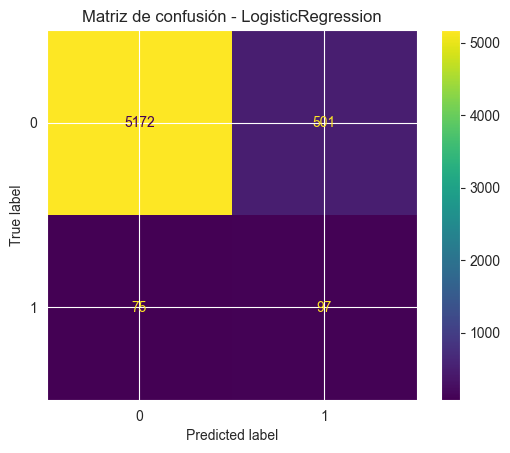

AUC-ROC (train): 0.8323
AUC-ROC (test) : 0.8364
PR-AUC  (train): 0.2363
PR-AUC  (test) : 0.2832
[LogisticRegression] Accuracy train: 0.8804 | test: 0.8908
[LogisticRegression] Balanced Acc train: 0.7365 | test: 0.7408
[LogisticRegression] Precision(1): 0.1502 | Recall(1): 0.5814 | F1(1): 0.2387
[LogisticRegression] Confusion matrix (test):
[[5107  566]
 [  72  100]]


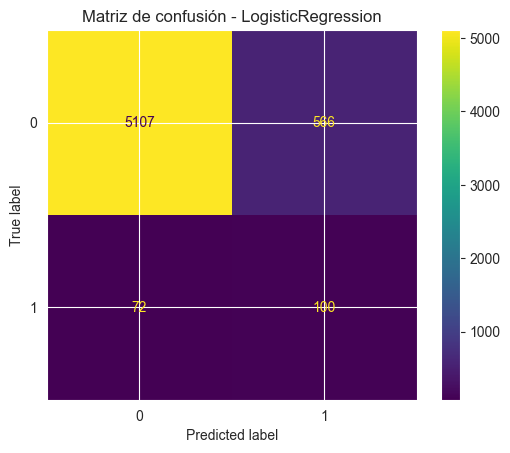

AUC-ROC (train): 0.8321
AUC-ROC (test) : 0.8360
PR-AUC  (train): 0.2319
PR-AUC  (test) : 0.2755
[LogisticRegression] Accuracy train: 0.8875 | test: 0.8955
[LogisticRegression] Balanced Acc train: 0.7282 | test: 0.7319
[LogisticRegression] Precision(1): 0.1521 | Recall(1): 0.5581 | F1(1): 0.2391
[LogisticRegression] Confusion matrix (test):
[[5138  535]
 [  76   96]]


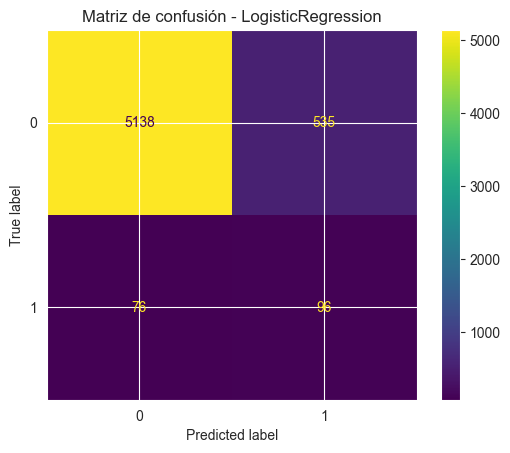

AUC-ROC (train): 0.8316
AUC-ROC (test) : 0.8357
PR-AUC  (train): 0.2303
PR-AUC  (test) : 0.2729
[LogisticRegression] Accuracy train: 0.9334 | test: 0.9405
[LogisticRegression] Balanced Acc train: 0.6862 | test: 0.6959
[LogisticRegression] Precision(1): 0.2301 | Recall(1): 0.4360 | F1(1): 0.3012
[LogisticRegression] Confusion matrix (test):
[[5422  251]
 [  97   75]]


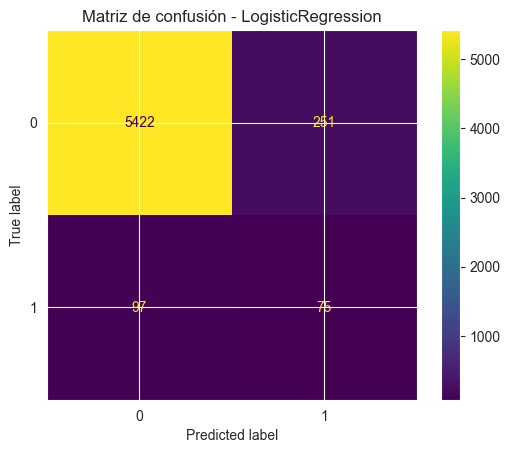

AUC-ROC (train): 0.8311
AUC-ROC (test) : 0.8325
PR-AUC  (train): 0.2742
PR-AUC  (test) : 0.3579
[LogisticRegression] Accuracy train: 0.9055 | test: 0.9110
[LogisticRegression] Balanced Acc train: 0.7142 | test: 0.7146
[LogisticRegression] Precision(1): 0.1667 | Recall(1): 0.5058 | F1(1): 0.2507
[LogisticRegression] Confusion matrix (test):
[[5238  435]
 [  85   87]]


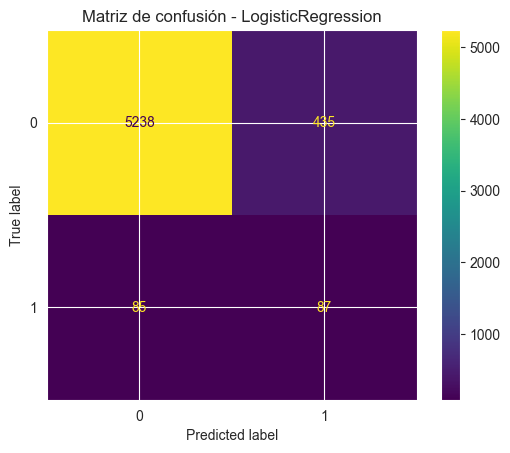

AUC-ROC (train): 0.8305
AUC-ROC (test) : 0.8319
PR-AUC  (train): 0.2653
PR-AUC  (test) : 0.3453
[LogisticRegression] Accuracy train: 0.9020 | test: 0.9093
[LogisticRegression] Balanced Acc train: 0.7180 | test: 0.7193
[LogisticRegression] Precision(1): 0.1660 | Recall(1): 0.5174 | F1(1): 0.2514
[LogisticRegression] Confusion matrix (test):
[[5226  447]
 [  83   89]]


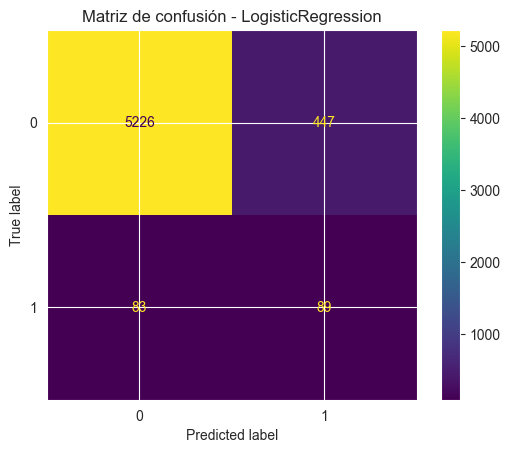

AUC-ROC (train): 0.8302
AUC-ROC (test) : 0.8322
PR-AUC  (train): 0.2607
PR-AUC  (test) : 0.3371
[LogisticRegression] Accuracy train: 0.9206 | test: 0.9273
[LogisticRegression] Balanced Acc train: 0.7001 | test: 0.7229
[LogisticRegression] Precision(1): 0.2037 | Recall(1): 0.5058 | F1(1): 0.2905
[LogisticRegression] Confusion matrix (test):
[[5333  340]
 [  85   87]]


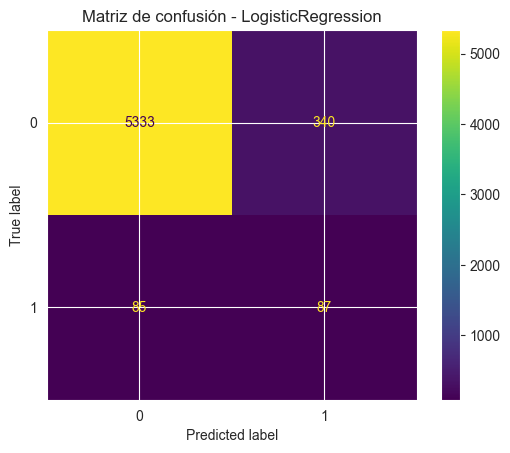

AUC-ROC (train): 0.8300
AUC-ROC (test) : 0.8319
PR-AUC  (train): 0.2561
PR-AUC  (test) : 0.3276
[LogisticRegression] Accuracy train: 0.9149 | test: 0.9206
[LogisticRegression] Balanced Acc train: 0.7049 | test: 0.7195
[LogisticRegression] Precision(1): 0.1867 | Recall(1): 0.5058 | F1(1): 0.2727
[LogisticRegression] Confusion matrix (test):
[[5294  379]
 [  85   87]]


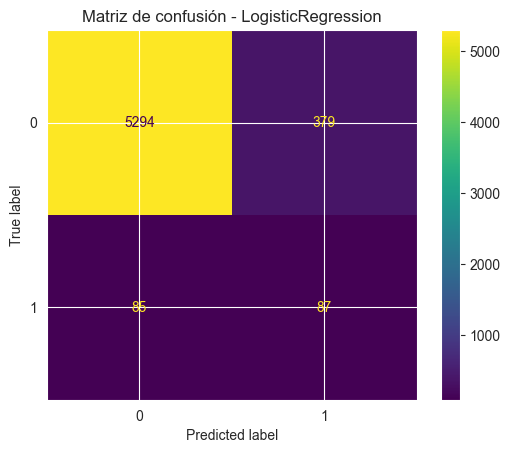

AUC-ROC (train): 0.8303
AUC-ROC (test) : 0.8326
PR-AUC  (train): 0.2545
PR-AUC  (test) : 0.3251
[LogisticRegression] Accuracy train: 0.9138 | test: 0.9186
[LogisticRegression] Balanced Acc train: 0.7050 | test: 0.7213
[LogisticRegression] Precision(1): 0.1833 | Recall(1): 0.5116 | F1(1): 0.2699
[LogisticRegression] Confusion matrix (test):
[[5281  392]
 [  84   88]]


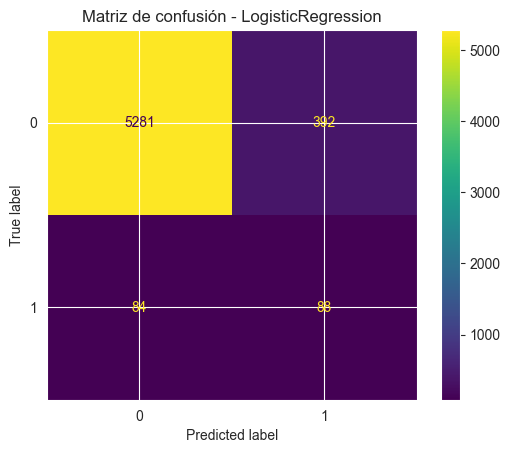

AUC-ROC (train): 0.8303
AUC-ROC (test) : 0.8326
PR-AUC  (train): 0.2509
PR-AUC  (test) : 0.3196
[LogisticRegression] Accuracy train: 0.9123 | test: 0.9187
[LogisticRegression] Balanced Acc train: 0.7142 | test: 0.7242
[LogisticRegression] Precision(1): 0.1850 | Recall(1): 0.5174 | F1(1): 0.2726
[LogisticRegression] Confusion matrix (test):
[[5281  392]
 [  83   89]]


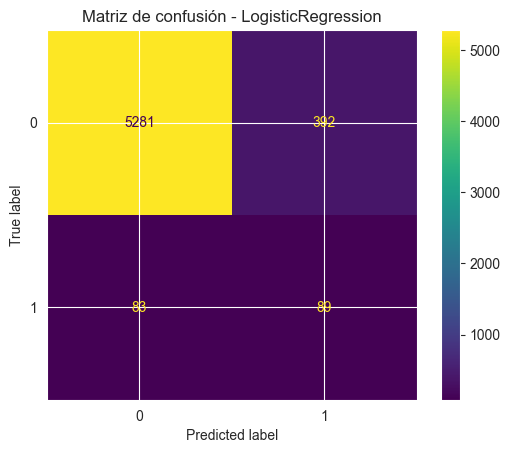

AUC-ROC (train): 0.8335
AUC-ROC (test) : 0.8343
PR-AUC  (train): 0.2581
PR-AUC  (test) : 0.3182
[LogisticRegression] Accuracy train: 0.9000 | test: 0.9062
[LogisticRegression] Balanced Acc train: 0.7156 | test: 0.7290
[LogisticRegression] Precision(1): 0.1655 | Recall(1): 0.5407 | F1(1): 0.2534
[LogisticRegression] Confusion matrix (test):
[[5204  469]
 [  79   93]]


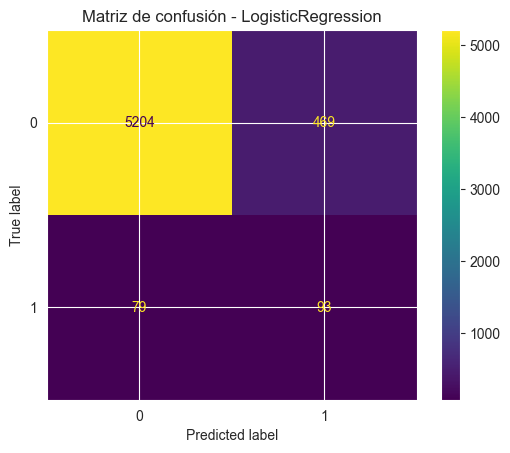

AUC-ROC (train): 0.8301
AUC-ROC (test) : 0.8308
PR-AUC  (train): 0.2355
PR-AUC  (test) : 0.2870
[LogisticRegression] Accuracy train: 0.8956 | test: 0.9004
[LogisticRegression] Balanced Acc train: 0.7112 | test: 0.7147
[LogisticRegression] Precision(1): 0.1514 | Recall(1): 0.5174 | F1(1): 0.2342
[LogisticRegression] Confusion matrix (test):
[[5174  499]
 [  83   89]]


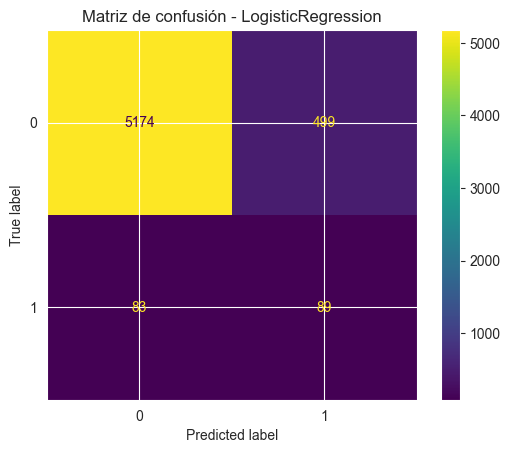

AUC-ROC (train): 0.8256
AUC-ROC (test) : 0.8257
PR-AUC  (train): 0.2181
PR-AUC  (test) : 0.2704
[LogisticRegression] Accuracy train: 0.8910 | test: 0.8962
[LogisticRegression] Balanced Acc train: 0.7088 | test: 0.7125
[LogisticRegression] Precision(1): 0.1452 | Recall(1): 0.5174 | F1(1): 0.2268
[LogisticRegression] Confusion matrix (test):
[[5149  524]
 [  83   89]]


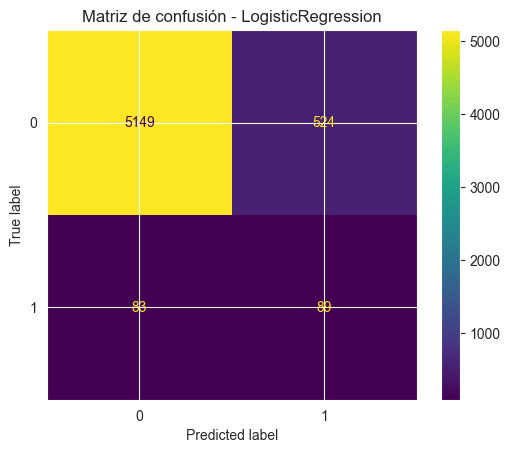

AUC-ROC (train): 0.8240
AUC-ROC (test) : 0.8238
PR-AUC  (train): 0.2099
PR-AUC  (test) : 0.2624
[LogisticRegression] Accuracy train: 0.8791 | test: 0.8862
[LogisticRegression] Balanced Acc train: 0.7133 | test: 0.7272
[LogisticRegression] Precision(1): 0.1401 | Recall(1): 0.5581 | F1(1): 0.2240
[LogisticRegression] Confusion matrix (test):
[[5084  589]
 [  76   96]]


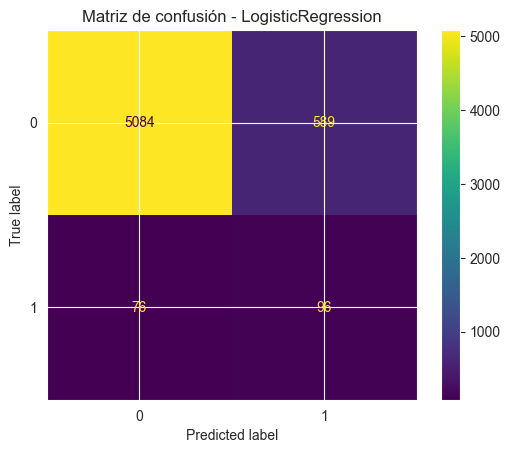

AUC-ROC (train): 0.8230
AUC-ROC (test) : 0.8225
PR-AUC  (train): 0.2053
PR-AUC  (test) : 0.2560
[LogisticRegression] Accuracy train: 0.8732 | test: 0.8802
[LogisticRegression] Balanced Acc train: 0.7166 | test: 0.7241
[LogisticRegression] Precision(1): 0.1333 | Recall(1): 0.5581 | F1(1): 0.2152
[LogisticRegression] Confusion matrix (test):
[[5049  624]
 [  76   96]]


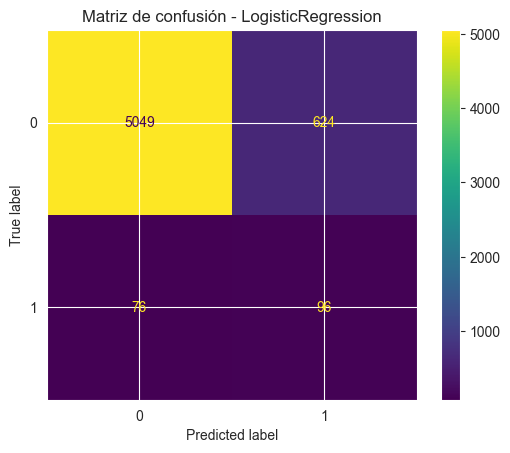

AUC-ROC (train): 0.8225
AUC-ROC (test) : 0.8219
PR-AUC  (train): 0.2032
PR-AUC  (test) : 0.2529
[LogisticRegression] Accuracy train: 0.8630 | test: 0.8676
[LogisticRegression] Balanced Acc train: 0.7354 | test: 0.7486
[LogisticRegression] Precision(1): 0.1311 | Recall(1): 0.6221 | F1(1): 0.2166
[LogisticRegression] Confusion matrix (test):
[[4964  709]
 [  65  107]]


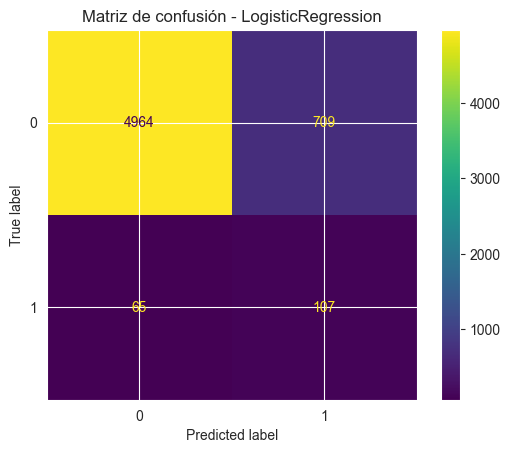

AUC-ROC (train): 0.8361
AUC-ROC (test) : 0.8356
PR-AUC  (train): 0.2452
PR-AUC  (test) : 0.3113
[LogisticRegression] Accuracy train: 0.8473 | test: 0.8518
[LogisticRegression] Balanced Acc train: 0.7449 | test: 0.7461
[LogisticRegression] Precision(1): 0.1195 | Recall(1): 0.6337 | F1(1): 0.2011
[LogisticRegression] Confusion matrix (test):
[[4870  803]
 [  63  109]]


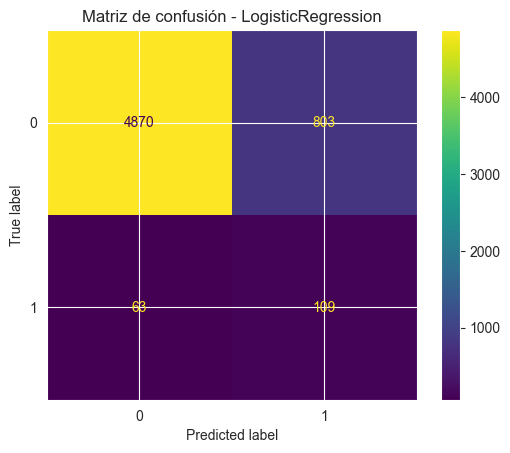

AUC-ROC (train): 0.8353
AUC-ROC (test) : 0.8373
PR-AUC  (train): 0.2674
PR-AUC  (test) : 0.3385
[LogisticRegression] Accuracy train: 0.8564 | test: 0.8619
[LogisticRegression] Balanced Acc train: 0.7425 | test: 0.7485
[LogisticRegression] Precision(1): 0.1269 | Recall(1): 0.6279 | F1(1): 0.2111
[LogisticRegression] Confusion matrix (test):
[[4930  743]
 [  64  108]]


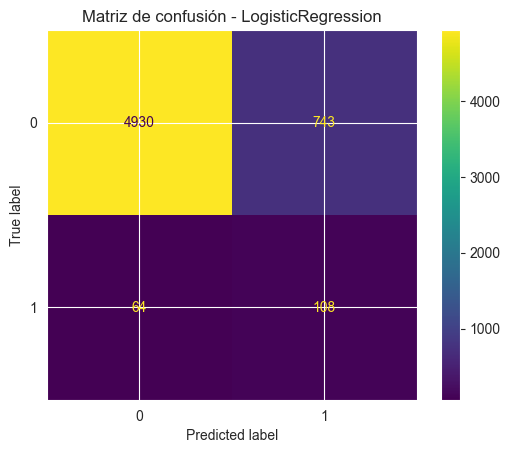

AUC-ROC (train): 0.8360
AUC-ROC (test) : 0.8378
PR-AUC  (train): 0.2598
PR-AUC  (test) : 0.3279
[LogisticRegression] Accuracy train: 0.8498 | test: 0.8542
[LogisticRegression] Balanced Acc train: 0.7476 | test: 0.7530
[LogisticRegression] Precision(1): 0.1231 | Recall(1): 0.6453 | F1(1): 0.2067
[LogisticRegression] Confusion matrix (test):
[[4882  791]
 [  61  111]]


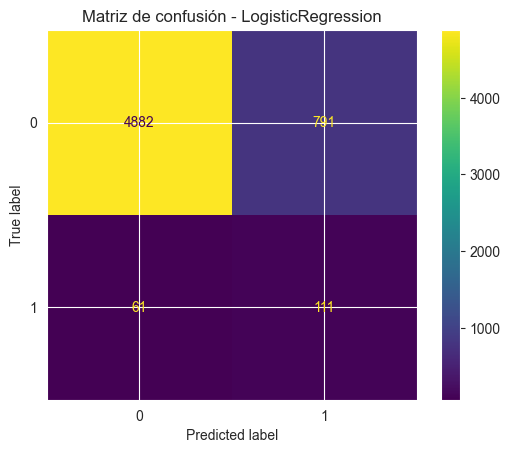

AUC-ROC (train): 0.8364
AUC-ROC (test) : 0.8388
PR-AUC  (train): 0.2572
PR-AUC  (test) : 0.3285
[LogisticRegression] Accuracy train: 0.8759 | test: 0.8808
[LogisticRegression] Balanced Acc train: 0.7371 | test: 0.7441
[LogisticRegression] Precision(1): 0.1409 | Recall(1): 0.5988 | F1(1): 0.2281
[LogisticRegression] Confusion matrix (test):
[[5045  628]
 [  69  103]]


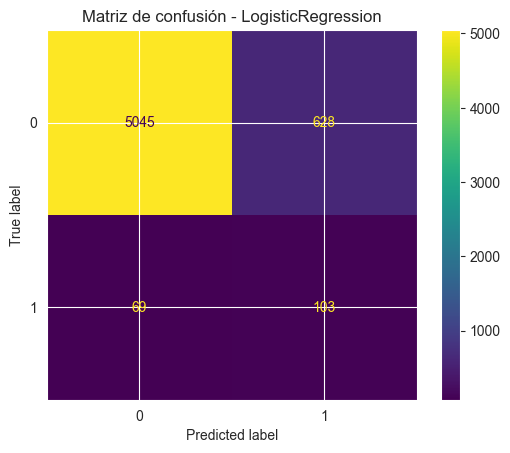

AUC-ROC (train): 0.8367
AUC-ROC (test) : 0.8387
PR-AUC  (train): 0.2549
PR-AUC  (test) : 0.3255
[LogisticRegression] Accuracy train: 0.8725 | test: 0.8782
[LogisticRegression] Balanced Acc train: 0.7367 | test: 0.7484
[LogisticRegression] Precision(1): 0.1400 | Recall(1): 0.6105 | F1(1): 0.2278
[LogisticRegression] Confusion matrix (test):
[[5028  645]
 [  67  105]]


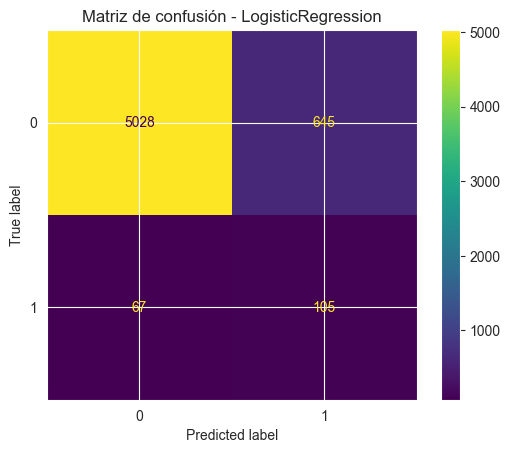

AUC-ROC (train): 0.8364
AUC-ROC (test) : 0.8377
PR-AUC  (train): 0.2514
PR-AUC  (test) : 0.3222
[LogisticRegression] Accuracy train: 0.8717 | test: 0.8782
[LogisticRegression] Balanced Acc train: 0.7398 | test: 0.7399
[LogisticRegression] Precision(1): 0.1371 | Recall(1): 0.5930 | F1(1): 0.2227
[LogisticRegression] Confusion matrix (test):
[[5031  642]
 [  70  102]]


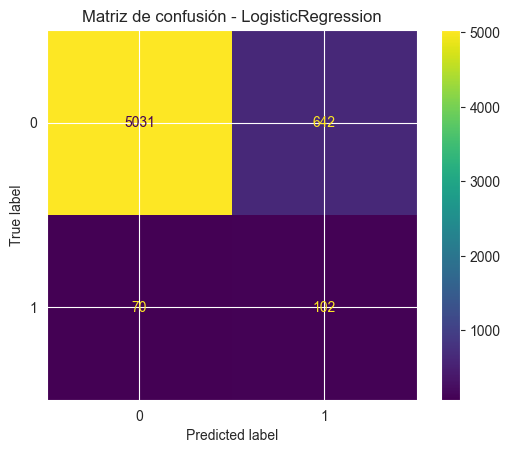

AUC-ROC (train): 0.8361
AUC-ROC (test) : 0.8366
PR-AUC  (train): 0.2486
PR-AUC  (test) : 0.3192
[LogisticRegression] Accuracy train: 0.8586 | test: 0.8652
[LogisticRegression] Balanced Acc train: 0.7472 | test: 0.7558
[LogisticRegression] Precision(1): 0.1316 | Recall(1): 0.6395 | F1(1): 0.2183
[LogisticRegression] Confusion matrix (test):
[[4947  726]
 [  62  110]]


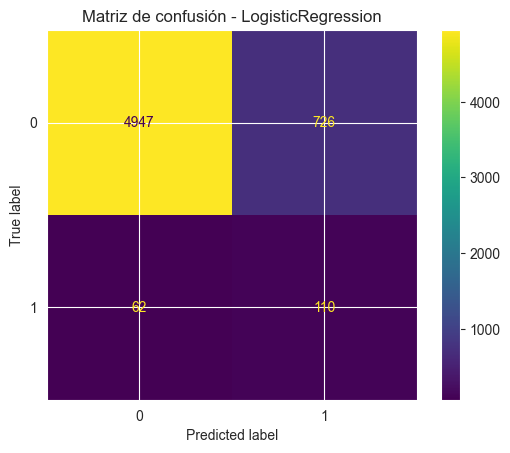

AUC-ROC (train): 0.8339
AUC-ROC (test) : 0.8359
PR-AUC  (train): 0.2664
PR-AUC  (test) : 0.3312
[LogisticRegression] Accuracy train: 0.8326 | test: 0.8390
[LogisticRegression] Balanced Acc train: 0.7416 | test: 0.7508
[LogisticRegression] Precision(1): 0.1136 | Recall(1): 0.6570 | F1(1): 0.1937
[LogisticRegression] Confusion matrix (test):
[[4791  882]
 [  59  113]]


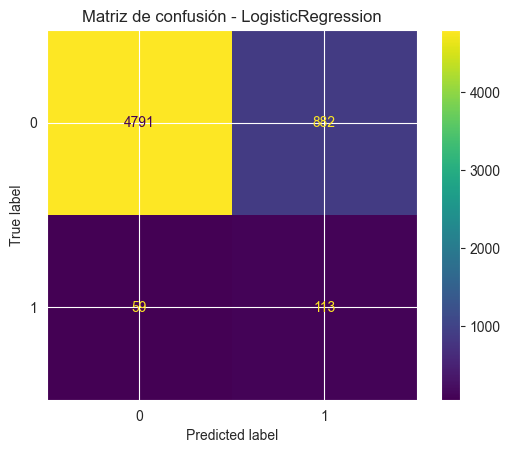

AUC-ROC (train): 0.8292
AUC-ROC (test) : 0.8294
PR-AUC  (train): 0.2421
PR-AUC  (test) : 0.3015
[LogisticRegression] Accuracy train: 0.8916 | test: 0.8972
[LogisticRegression] Balanced Acc train: 0.7127 | test: 0.7300
[LogisticRegression] Precision(1): 0.1535 | Recall(1): 0.5523 | F1(1): 0.2402
[LogisticRegression] Confusion matrix (test):
[[5149  524]
 [  77   95]]


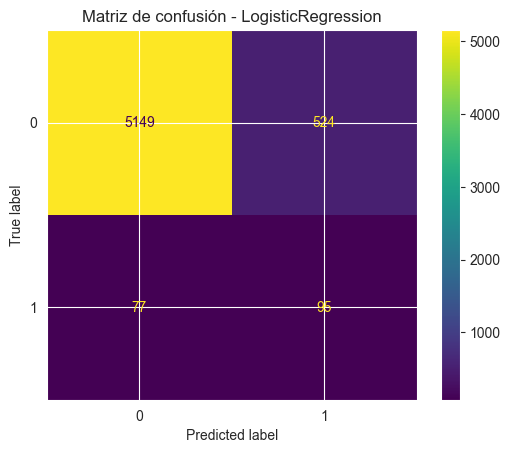

AUC-ROC (train): 0.8253
AUC-ROC (test) : 0.8252
PR-AUC  (train): 0.2231
PR-AUC  (test) : 0.2782
[LogisticRegression] Accuracy train: 0.8984 | test: 0.9047
[LogisticRegression] Balanced Acc train: 0.7063 | test: 0.7169
[LogisticRegression] Precision(1): 0.1581 | Recall(1): 0.5174 | F1(1): 0.2422
[LogisticRegression] Confusion matrix (test):
[[5199  474]
 [  83   89]]


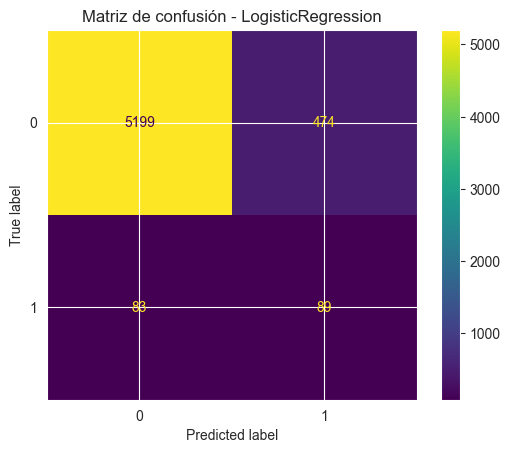

AUC-ROC (train): 0.8242
AUC-ROC (test) : 0.8241
PR-AUC  (train): 0.2150
PR-AUC  (test) : 0.2680
[LogisticRegression] Accuracy train: 0.8929 | test: 0.8982
[LogisticRegression] Balanced Acc train: 0.7119 | test: 0.7192
[LogisticRegression] Precision(1): 0.1504 | Recall(1): 0.5291 | F1(1): 0.2342
[LogisticRegression] Confusion matrix (test):
[[5159  514]
 [  81   91]]


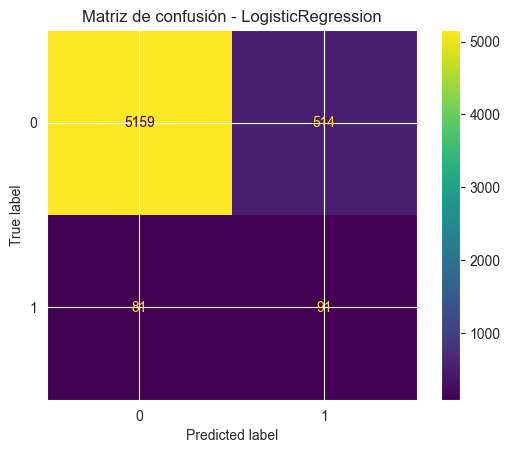

AUC-ROC (train): 0.8240
AUC-ROC (test) : 0.8241
PR-AUC  (train): 0.2118
PR-AUC  (test) : 0.2652
[LogisticRegression] Accuracy train: 0.8907 | test: 0.8963
[LogisticRegression] Balanced Acc train: 0.7115 | test: 0.7239
[LogisticRegression] Precision(1): 0.1500 | Recall(1): 0.5407 | F1(1): 0.2348
[LogisticRegression] Confusion matrix (test):
[[5146  527]
 [  79   93]]


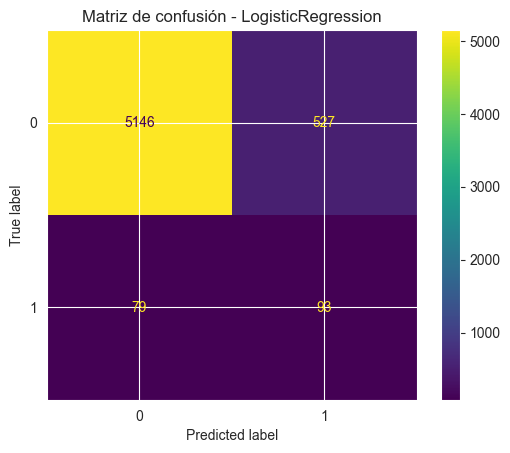

AUC-ROC (train): 0.8234
AUC-ROC (test) : 0.8232
PR-AUC  (train): 0.2089
PR-AUC  (test) : 0.2611
[LogisticRegression] Accuracy train: 0.8928 | test: 0.9015
[LogisticRegression] Balanced Acc train: 0.7394 | test: 0.7463
[LogisticRegression] Precision(1): 0.1656 | Recall(1): 0.5814 | F1(1): 0.2577
[LogisticRegression] Confusion matrix (test):
[[5169  504]
 [  72  100]]


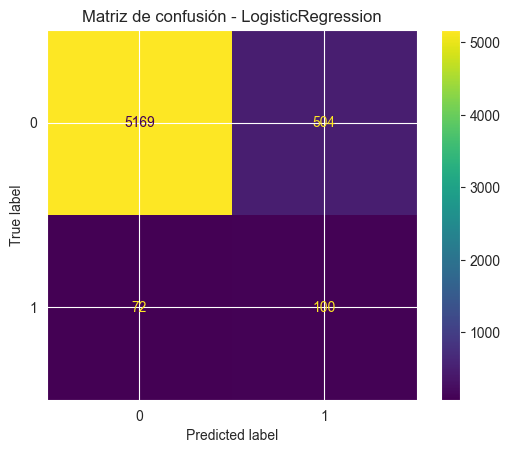

AUC-ROC (train): 0.8351
AUC-ROC (test) : 0.8390
PR-AUC  (train): 0.2680
PR-AUC  (test) : 0.3275
[LogisticRegression] Accuracy train: 0.8877 | test: 0.8985
[LogisticRegression] Balanced Acc train: 0.7347 | test: 0.7448
[LogisticRegression] Precision(1): 0.1610 | Recall(1): 0.5814 | F1(1): 0.2522
[LogisticRegression] Confusion matrix (test):
[[5152  521]
 [  72  100]]


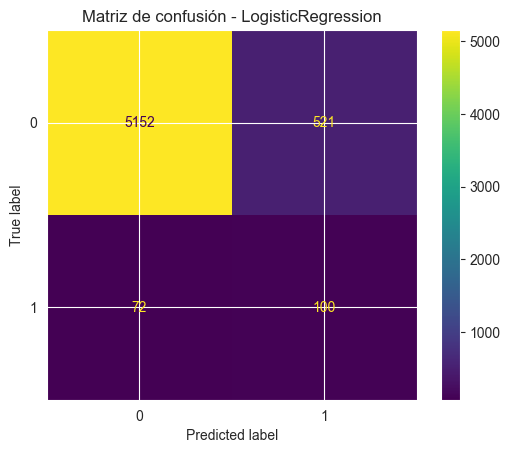

AUC-ROC (train): 0.8343
AUC-ROC (test) : 0.8385
PR-AUC  (train): 0.2560
PR-AUC  (test) : 0.3065
[LogisticRegression] Accuracy train: 0.8952 | test: 0.9042
[LogisticRegression] Balanced Acc train: 0.7251 | test: 0.7308
[LogisticRegression] Precision(1): 0.1632 | Recall(1): 0.5465 | F1(1): 0.2513
[LogisticRegression] Confusion matrix (test):
[[5191  482]
 [  78   94]]


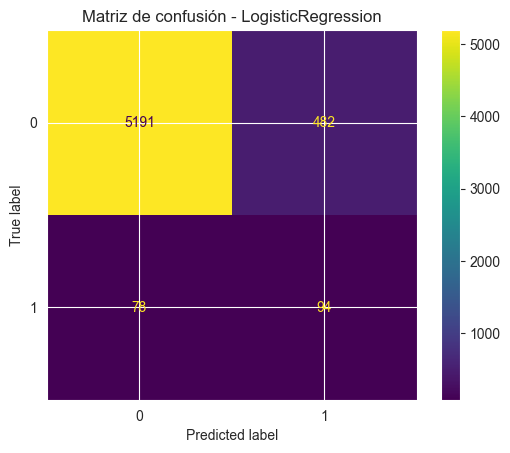

AUC-ROC (train): 0.8326
AUC-ROC (test) : 0.8366
PR-AUC  (train): 0.2413
PR-AUC  (test) : 0.2889
[LogisticRegression] Accuracy train: 0.8924 | test: 0.9016
[LogisticRegression] Balanced Acc train: 0.7286 | test: 0.7379
[LogisticRegression] Precision(1): 0.1625 | Recall(1): 0.5640 | F1(1): 0.2523
[LogisticRegression] Confusion matrix (test):
[[5173  500]
 [  75   97]]


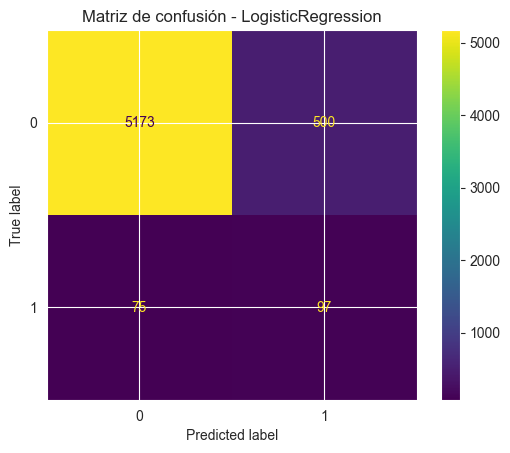

AUC-ROC (train): 0.8323
AUC-ROC (test) : 0.8364
PR-AUC  (train): 0.2364
PR-AUC  (test) : 0.2832
[LogisticRegression] Accuracy train: 0.8868 | test: 0.8953
[LogisticRegression] Balanced Acc train: 0.7328 | test: 0.7346
[LogisticRegression] Precision(1): 0.1530 | Recall(1): 0.5640 | F1(1): 0.2407
[LogisticRegression] Confusion matrix (test):
[[5136  537]
 [  75   97]]


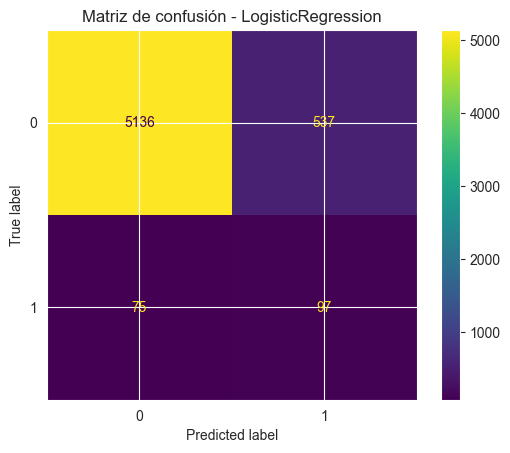

AUC-ROC (train): 0.8320
AUC-ROC (test) : 0.8360
PR-AUC  (train): 0.2319
PR-AUC  (test) : 0.2755
[LogisticRegression] Accuracy train: 0.8884 | test: 0.8960
[LogisticRegression] Balanced Acc train: 0.7280 | test: 0.7322
[LogisticRegression] Precision(1): 0.1529 | Recall(1): 0.5581 | F1(1): 0.2400
[LogisticRegression] Confusion matrix (test):
[[5141  532]
 [  76   96]]


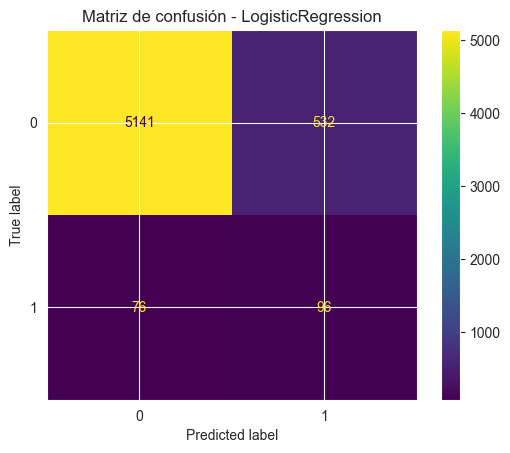

AUC-ROC (train): 0.8316
AUC-ROC (test) : 0.8357
PR-AUC  (train): 0.2303
PR-AUC  (test) : 0.2731
[LogisticRegression] Accuracy train: 0.9351 | test: 0.9417
[LogisticRegression] Balanced Acc train: 0.6836 | test: 0.6965
[LogisticRegression] Precision(1): 0.2351 | Recall(1): 0.4360 | F1(1): 0.3055
[LogisticRegression] Confusion matrix (test):
[[5429  244]
 [  97   75]]


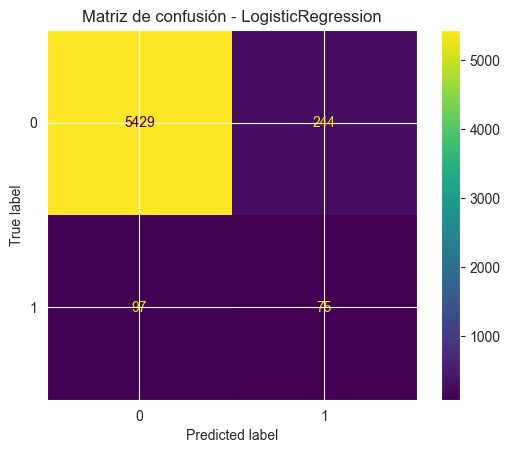

AUC-ROC (train): 0.8311
AUC-ROC (test) : 0.8325
PR-AUC  (train): 0.2742
PR-AUC  (test) : 0.3580
[LogisticRegression] Accuracy train: 0.9058 | test: 0.9114
[LogisticRegression] Balanced Acc train: 0.7136 | test: 0.7147
[LogisticRegression] Precision(1): 0.1673 | Recall(1): 0.5058 | F1(1): 0.2514
[LogisticRegression] Confusion matrix (test):
[[5240  433]
 [  85   87]]


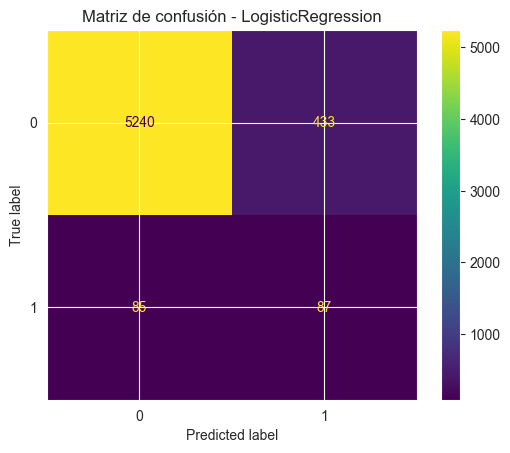

AUC-ROC (train): 0.8304
AUC-ROC (test) : 0.8319
PR-AUC  (train): 0.2653
PR-AUC  (test) : 0.3451
[LogisticRegression] Accuracy train: 0.9026 | test: 0.9093
[LogisticRegression] Balanced Acc train: 0.7184 | test: 0.7193
[LogisticRegression] Precision(1): 0.1660 | Recall(1): 0.5174 | F1(1): 0.2514
[LogisticRegression] Confusion matrix (test):
[[5226  447]
 [  83   89]]


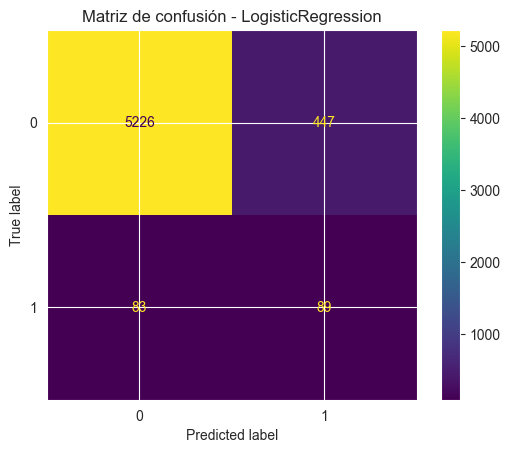

AUC-ROC (train): 0.8302
AUC-ROC (test) : 0.8322
PR-AUC  (train): 0.2607
PR-AUC  (test) : 0.3372
[LogisticRegression] Accuracy train: 0.9208 | test: 0.9271
[LogisticRegression] Balanced Acc train: 0.7002 | test: 0.7229
[LogisticRegression] Precision(1): 0.2033 | Recall(1): 0.5058 | F1(1): 0.2900
[LogisticRegression] Confusion matrix (test):
[[5332  341]
 [  85   87]]


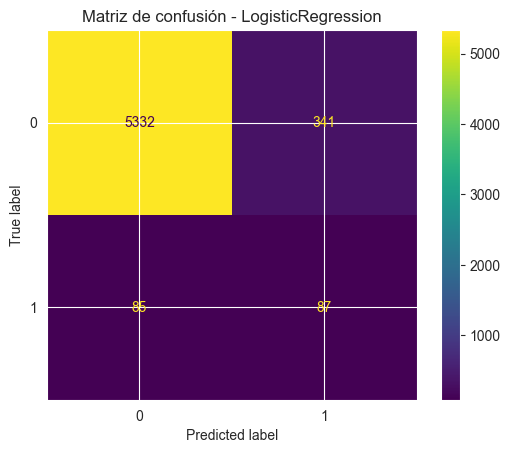

AUC-ROC (train): 0.8300
AUC-ROC (test) : 0.8320
PR-AUC  (train): 0.2561
PR-AUC  (test) : 0.3277
[LogisticRegression] Accuracy train: 0.9150 | test: 0.9206
[LogisticRegression] Balanced Acc train: 0.7050 | test: 0.7195
[LogisticRegression] Precision(1): 0.1867 | Recall(1): 0.5058 | F1(1): 0.2727
[LogisticRegression] Confusion matrix (test):
[[5294  379]
 [  85   87]]


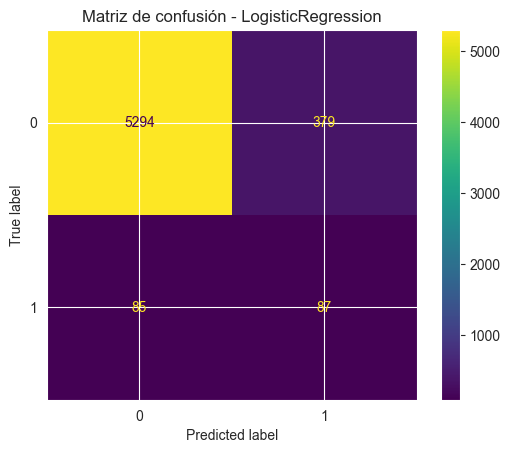

AUC-ROC (train): 0.8303
AUC-ROC (test) : 0.8326
PR-AUC  (train): 0.2545
PR-AUC  (test) : 0.3251
[LogisticRegression] Accuracy train: 0.9123 | test: 0.9170
[LogisticRegression] Balanced Acc train: 0.7071 | test: 0.7205
[LogisticRegression] Precision(1): 0.1800 | Recall(1): 0.5116 | F1(1): 0.2663
[LogisticRegression] Confusion matrix (test):
[[5272  401]
 [  84   88]]


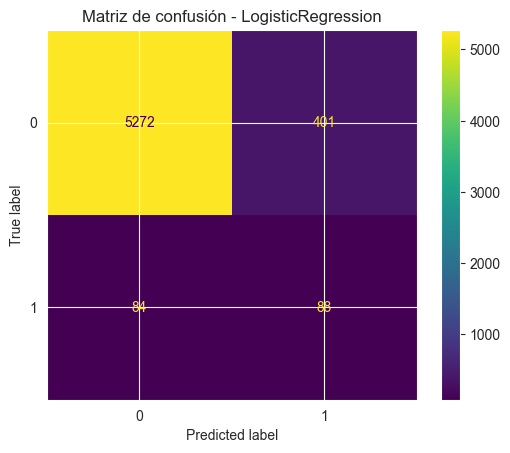

AUC-ROC (train): 0.8303
AUC-ROC (test) : 0.8326
PR-AUC  (train): 0.2508
PR-AUC  (test) : 0.3196
[LogisticRegression] Accuracy train: 0.9124 | test: 0.9186
[LogisticRegression] Balanced Acc train: 0.7142 | test: 0.7241
[LogisticRegression] Precision(1): 0.1846 | Recall(1): 0.5174 | F1(1): 0.2722
[LogisticRegression] Confusion matrix (test):
[[5280  393]
 [  83   89]]


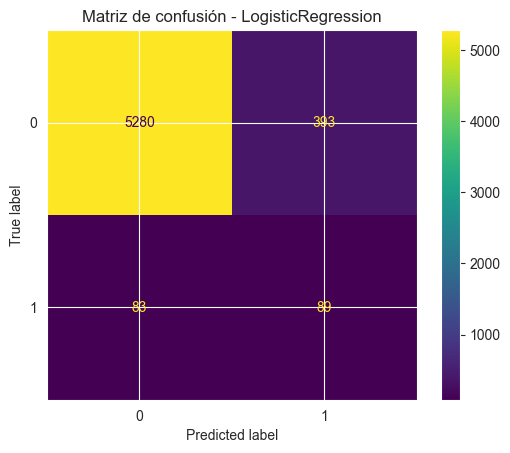

AUC-ROC (train): 0.8336
AUC-ROC (test) : 0.8343
PR-AUC  (train): 0.2583
PR-AUC  (test) : 0.3184
[LogisticRegression] Accuracy train: 0.9002 | test: 0.9062
[LogisticRegression] Balanced Acc train: 0.7157 | test: 0.7290
[LogisticRegression] Precision(1): 0.1655 | Recall(1): 0.5407 | F1(1): 0.2534
[LogisticRegression] Confusion matrix (test):
[[5204  469]
 [  79   93]]


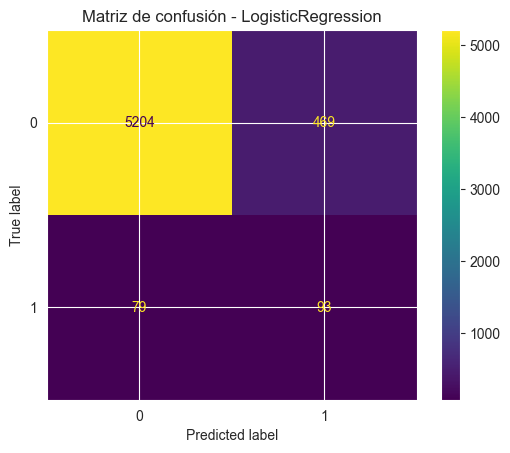

AUC-ROC (train): 0.8301
AUC-ROC (test) : 0.8309
PR-AUC  (train): 0.2356
PR-AUC  (test) : 0.2871
[LogisticRegression] Accuracy train: 0.8955 | test: 0.9004
[LogisticRegression] Balanced Acc train: 0.7111 | test: 0.7147
[LogisticRegression] Precision(1): 0.1514 | Recall(1): 0.5174 | F1(1): 0.2342
[LogisticRegression] Confusion matrix (test):
[[5174  499]
 [  83   89]]


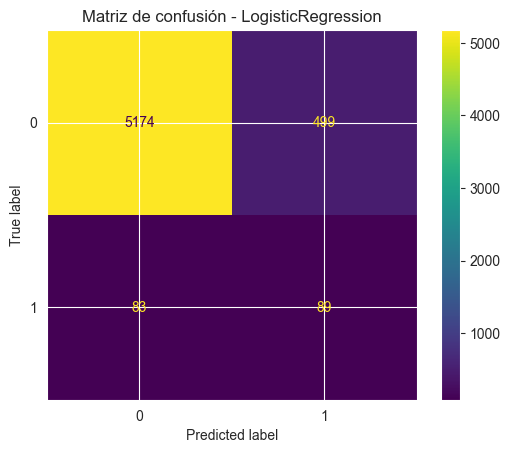

AUC-ROC (train): 0.8256
AUC-ROC (test) : 0.8257
PR-AUC  (train): 0.2180
PR-AUC  (test) : 0.2705
[LogisticRegression] Accuracy train: 0.8914 | test: 0.8965
[LogisticRegression] Balanced Acc train: 0.7083 | test: 0.7127
[LogisticRegression] Precision(1): 0.1457 | Recall(1): 0.5174 | F1(1): 0.2273
[LogisticRegression] Confusion matrix (test):
[[5151  522]
 [  83   89]]


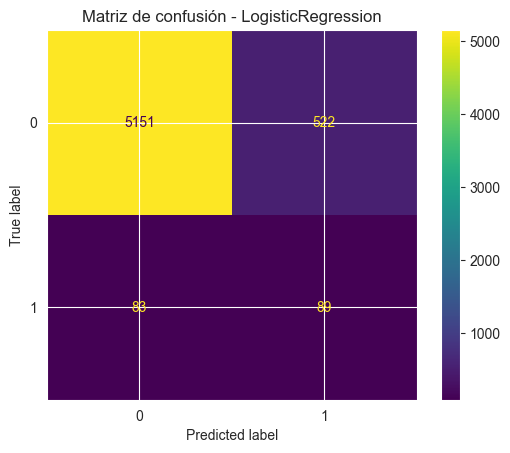

AUC-ROC (train): 0.8240
AUC-ROC (test) : 0.8238
PR-AUC  (train): 0.2099
PR-AUC  (test) : 0.2624
[LogisticRegression] Accuracy train: 0.8751 | test: 0.8825
[LogisticRegression] Balanced Acc train: 0.7176 | test: 0.7252
[LogisticRegression] Precision(1): 0.1358 | Recall(1): 0.5581 | F1(1): 0.2184
[LogisticRegression] Confusion matrix (test):
[[5062  611]
 [  76   96]]


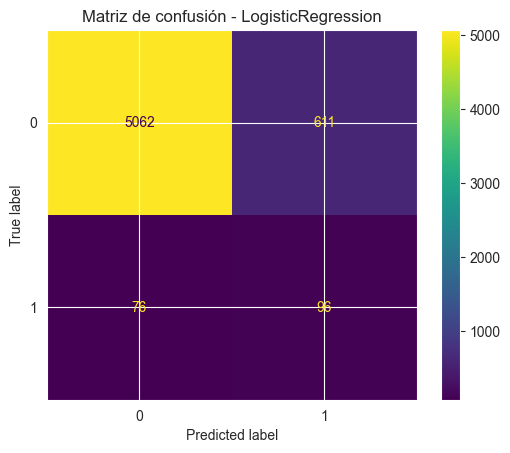

AUC-ROC (train): 0.8230
AUC-ROC (test) : 0.8226
PR-AUC  (train): 0.2054
PR-AUC  (test) : 0.2557
[LogisticRegression] Accuracy train: 0.8734 | test: 0.8808
[LogisticRegression] Balanced Acc train: 0.7167 | test: 0.7243
[LogisticRegression] Precision(1): 0.1339 | Recall(1): 0.5581 | F1(1): 0.2160
[LogisticRegression] Confusion matrix (test):
[[5052  621]
 [  76   96]]


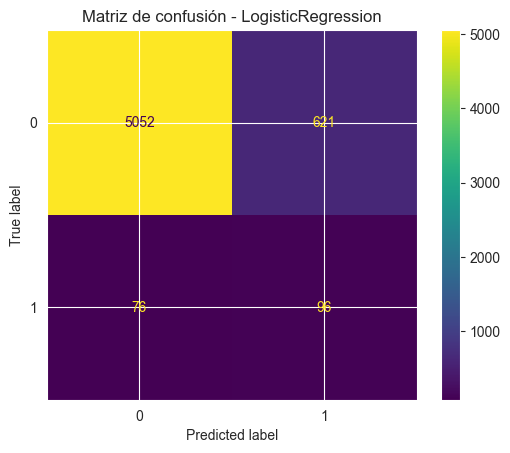

AUC-ROC (train): 0.8225
AUC-ROC (test) : 0.8219
PR-AUC  (train): 0.2032
PR-AUC  (test) : 0.2529
[LogisticRegression] Accuracy train: 0.8631 | test: 0.8676
[LogisticRegression] Balanced Acc train: 0.7354 | test: 0.7486
[LogisticRegression] Precision(1): 0.1311 | Recall(1): 0.6221 | F1(1): 0.2166
[LogisticRegression] Confusion matrix (test):
[[4964  709]
 [  65  107]]


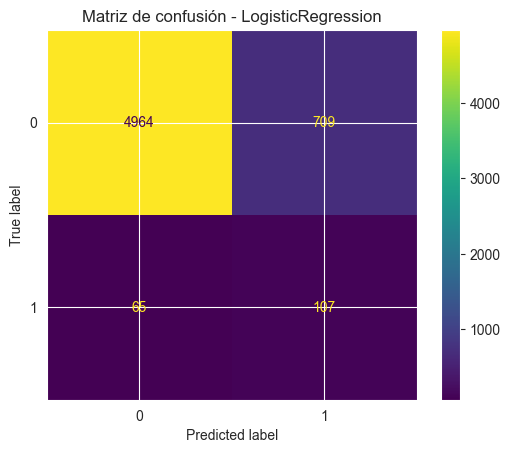

AUC-ROC (train): 0.8361
AUC-ROC (test) : 0.8356
PR-AUC  (train): 0.2452
PR-AUC  (test) : 0.3113
[LogisticRegression] Accuracy train: 0.8472 | test: 0.8515
[LogisticRegression] Balanced Acc train: 0.7448 | test: 0.7459
[LogisticRegression] Precision(1): 0.1193 | Recall(1): 0.6337 | F1(1): 0.2007
[LogisticRegression] Confusion matrix (test):
[[4868  805]
 [  63  109]]


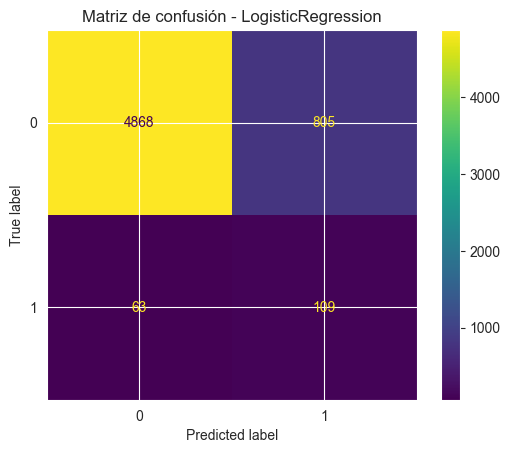

AUC-ROC (train): 0.8353
AUC-ROC (test) : 0.8373
PR-AUC  (train): 0.2672
PR-AUC  (test) : 0.3383
[LogisticRegression] Accuracy train: 0.8567 | test: 0.8619
[LogisticRegression] Balanced Acc train: 0.7427 | test: 0.7456
[LogisticRegression] Precision(1): 0.1260 | Recall(1): 0.6221 | F1(1): 0.2096
[LogisticRegression] Confusion matrix (test):
[[4931  742]
 [  65  107]]


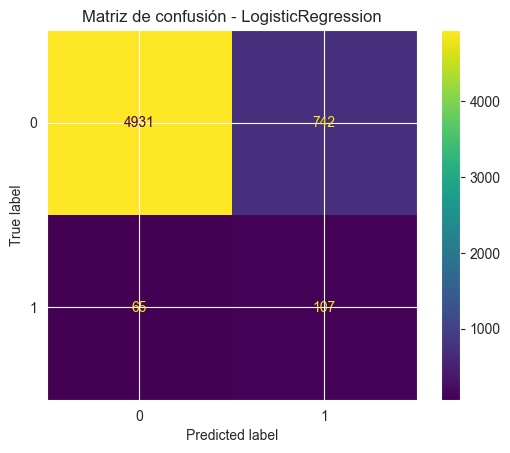

AUC-ROC (train): 0.8359
AUC-ROC (test) : 0.8378
PR-AUC  (train): 0.2599
PR-AUC  (test) : 0.3281
[LogisticRegression] Accuracy train: 0.8498 | test: 0.8542
[LogisticRegression] Balanced Acc train: 0.7476 | test: 0.7530
[LogisticRegression] Precision(1): 0.1231 | Recall(1): 0.6453 | F1(1): 0.2067
[LogisticRegression] Confusion matrix (test):
[[4882  791]
 [  61  111]]


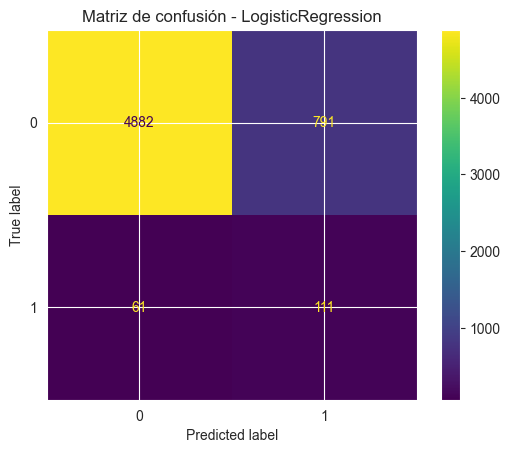

AUC-ROC (train): 0.8364
AUC-ROC (test) : 0.8388
PR-AUC  (train): 0.2571
PR-AUC  (test) : 0.3285
[LogisticRegression] Accuracy train: 0.8761 | test: 0.8809
[LogisticRegression] Balanced Acc train: 0.7371 | test: 0.7442
[LogisticRegression] Precision(1): 0.1411 | Recall(1): 0.5988 | F1(1): 0.2284
[LogisticRegression] Confusion matrix (test):
[[5046  627]
 [  69  103]]


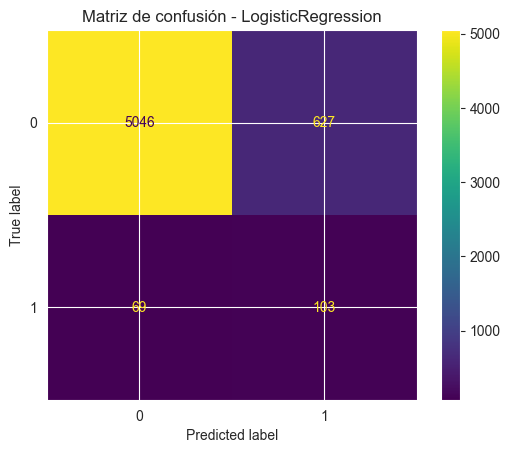

AUC-ROC (train): 0.8367
AUC-ROC (test) : 0.8387
PR-AUC  (train): 0.2548
PR-AUC  (test) : 0.3253
[LogisticRegression] Accuracy train: 0.8726 | test: 0.8787
[LogisticRegression] Balanced Acc train: 0.7368 | test: 0.7486
[LogisticRegression] Precision(1): 0.1406 | Recall(1): 0.6105 | F1(1): 0.2285
[LogisticRegression] Confusion matrix (test):
[[5031  642]
 [  67  105]]


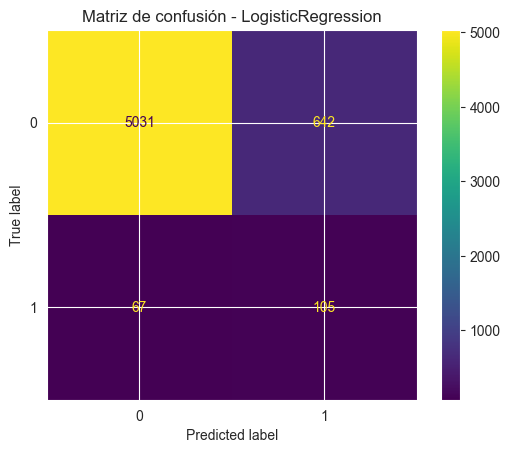

AUC-ROC (train): 0.8364
AUC-ROC (test) : 0.8378
PR-AUC  (train): 0.2514
PR-AUC  (test) : 0.3224
[LogisticRegression] Accuracy train: 0.8716 | test: 0.8780
[LogisticRegression] Balanced Acc train: 0.7398 | test: 0.7398
[LogisticRegression] Precision(1): 0.1369 | Recall(1): 0.5930 | F1(1): 0.2225
[LogisticRegression] Confusion matrix (test):
[[5030  643]
 [  70  102]]


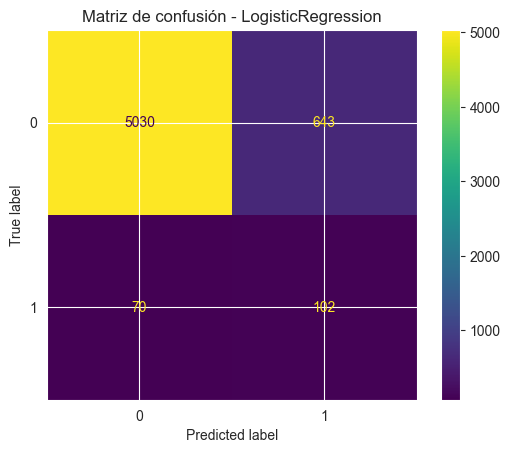

AUC-ROC (train): 0.8360
AUC-ROC (test) : 0.8366
PR-AUC  (train): 0.2486
PR-AUC  (test) : 0.3192
[LogisticRegression] Accuracy train: 0.8582 | test: 0.8650
[LogisticRegression] Balanced Acc train: 0.7470 | test: 0.7557
[LogisticRegression] Precision(1): 0.1314 | Recall(1): 0.6395 | F1(1): 0.2180
[LogisticRegression] Confusion matrix (test):
[[4946  727]
 [  62  110]]


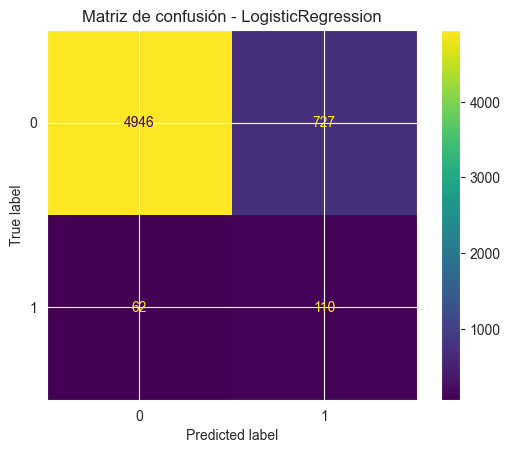

AUC-ROC (train): 0.8339
AUC-ROC (test) : 0.8359
PR-AUC  (train): 0.2663
PR-AUC  (test) : 0.3312
[LogisticRegression] Accuracy train: 0.8326 | test: 0.8393
[LogisticRegression] Balanced Acc train: 0.7416 | test: 0.7509
[LogisticRegression] Precision(1): 0.1138 | Recall(1): 0.6570 | F1(1): 0.1940
[LogisticRegression] Confusion matrix (test):
[[4793  880]
 [  59  113]]


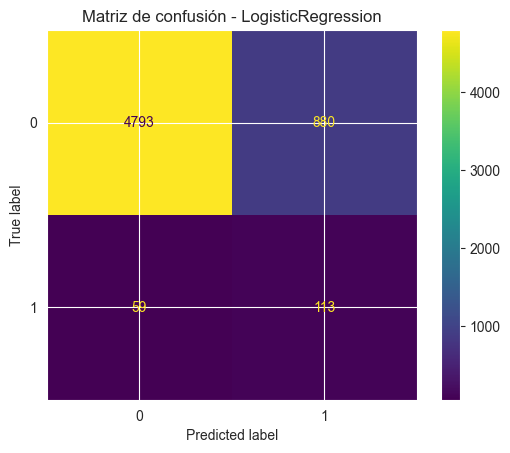

AUC-ROC (train): 0.8291
AUC-ROC (test) : 0.8293
PR-AUC  (train): 0.2419
PR-AUC  (test) : 0.3007
[LogisticRegression] Accuracy train: 0.8917 | test: 0.8973
[LogisticRegression] Balanced Acc train: 0.7127 | test: 0.7301
[LogisticRegression] Precision(1): 0.1537 | Recall(1): 0.5523 | F1(1): 0.2405
[LogisticRegression] Confusion matrix (test):
[[5150  523]
 [  77   95]]


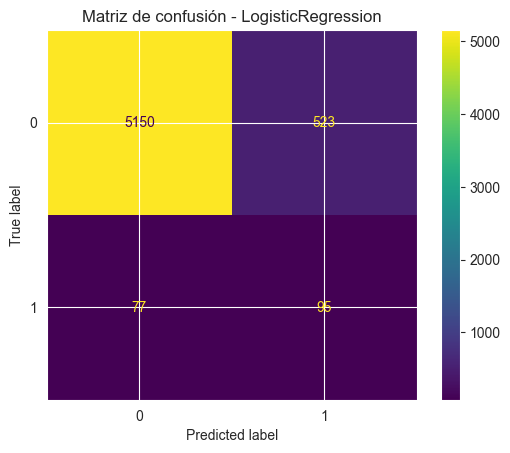

AUC-ROC (train): 0.8253
AUC-ROC (test) : 0.8253
PR-AUC  (train): 0.2231
PR-AUC  (test) : 0.2782
[LogisticRegression] Accuracy train: 0.8985 | test: 0.9045
[LogisticRegression] Balanced Acc train: 0.7070 | test: 0.7169
[LogisticRegression] Precision(1): 0.1578 | Recall(1): 0.5174 | F1(1): 0.2418
[LogisticRegression] Confusion matrix (test):
[[5198  475]
 [  83   89]]


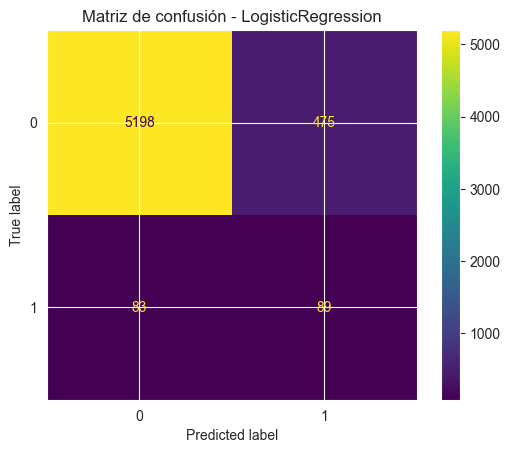

AUC-ROC (train): 0.8241
AUC-ROC (test) : 0.8241
PR-AUC  (train): 0.2150
PR-AUC  (test) : 0.2680
[LogisticRegression] Accuracy train: 0.8929 | test: 0.8982
[LogisticRegression] Balanced Acc train: 0.7119 | test: 0.7192
[LogisticRegression] Precision(1): 0.1504 | Recall(1): 0.5291 | F1(1): 0.2342
[LogisticRegression] Confusion matrix (test):
[[5159  514]
 [  81   91]]


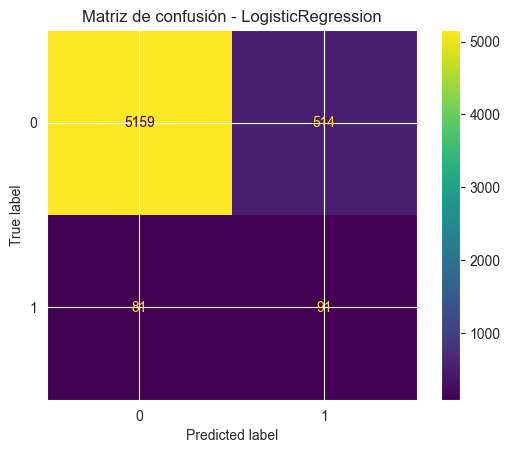

AUC-ROC (train): 0.8240
AUC-ROC (test) : 0.8240
PR-AUC  (train): 0.2117
PR-AUC  (test) : 0.2664
[LogisticRegression] Accuracy train: 0.8906 | test: 0.8963
[LogisticRegression] Balanced Acc train: 0.7115 | test: 0.7239
[LogisticRegression] Precision(1): 0.1500 | Recall(1): 0.5407 | F1(1): 0.2348
[LogisticRegression] Confusion matrix (test):
[[5146  527]
 [  79   93]]


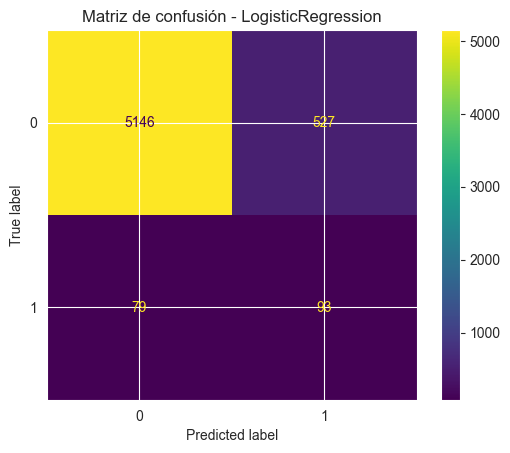

AUC-ROC (train): 0.8234
AUC-ROC (test) : 0.8232
PR-AUC  (train): 0.2088
PR-AUC  (test) : 0.2611
[LogisticRegression] Accuracy train: 0.8927 | test: 0.9013
[LogisticRegression] Balanced Acc train: 0.7386 | test: 0.7462
[LogisticRegression] Precision(1): 0.1653 | Recall(1): 0.5814 | F1(1): 0.2574
[LogisticRegression] Confusion matrix (test):
[[5168  505]
 [  72  100]]


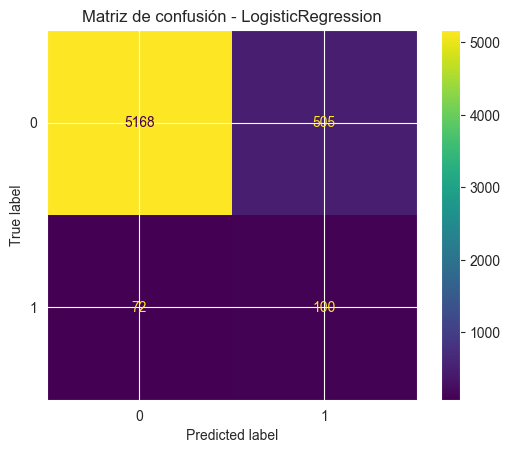

AUC-ROC (train): 0.8351
AUC-ROC (test) : 0.8389
PR-AUC  (train): 0.2680
PR-AUC  (test) : 0.3276
[LogisticRegression] Accuracy train: 0.8874 | test: 0.8985
[LogisticRegression] Balanced Acc train: 0.7352 | test: 0.7448
[LogisticRegression] Precision(1): 0.1610 | Recall(1): 0.5814 | F1(1): 0.2522
[LogisticRegression] Confusion matrix (test):
[[5152  521]
 [  72  100]]


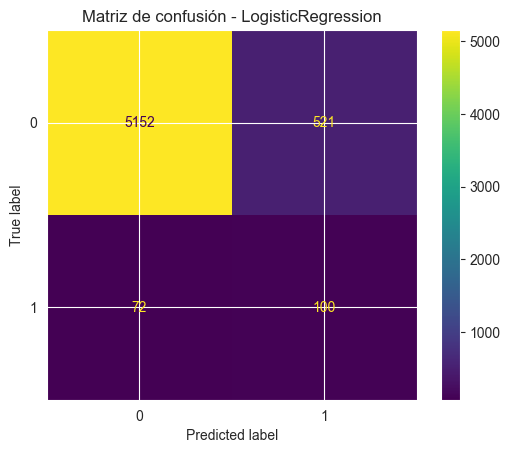

AUC-ROC (train): 0.8343
AUC-ROC (test) : 0.8385
PR-AUC  (train): 0.2560
PR-AUC  (test) : 0.3065
[LogisticRegression] Accuracy train: 0.8949 | test: 0.9040
[LogisticRegression] Balanced Acc train: 0.7257 | test: 0.7335
[LogisticRegression] Precision(1): 0.1641 | Recall(1): 0.5523 | F1(1): 0.2530
[LogisticRegression] Confusion matrix (test):
[[5189  484]
 [  77   95]]


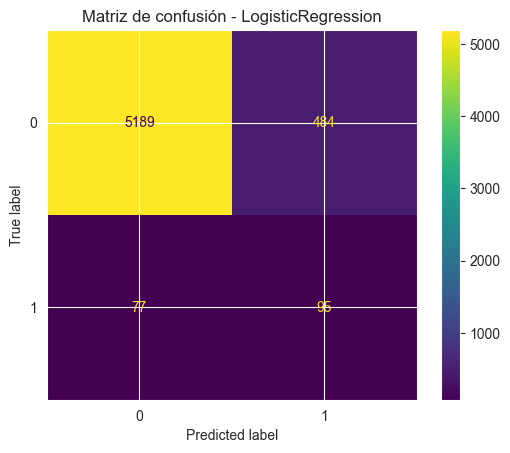

AUC-ROC (train): 0.8326
AUC-ROC (test) : 0.8366
PR-AUC  (train): 0.2412
PR-AUC  (test) : 0.2888
[LogisticRegression] Accuracy train: 0.8922 | test: 0.9015
[LogisticRegression] Balanced Acc train: 0.7285 | test: 0.7378
[LogisticRegression] Precision(1): 0.1622 | Recall(1): 0.5640 | F1(1): 0.2519
[LogisticRegression] Confusion matrix (test):
[[5172  501]
 [  75   97]]


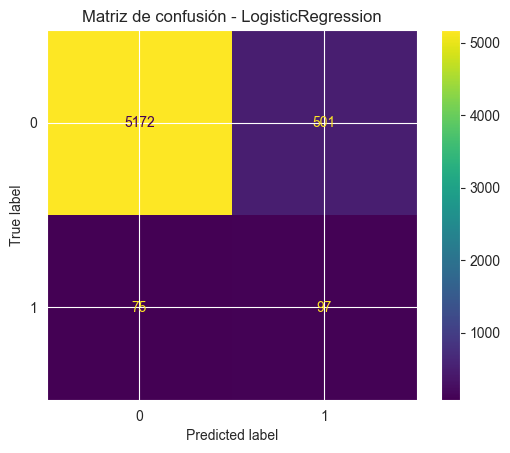

AUC-ROC (train): 0.8323
AUC-ROC (test) : 0.8364
PR-AUC  (train): 0.2363
PR-AUC  (test) : 0.2832
[LogisticRegression] Accuracy train: 0.8803 | test: 0.8908
[LogisticRegression] Balanced Acc train: 0.7365 | test: 0.7408
[LogisticRegression] Precision(1): 0.1502 | Recall(1): 0.5814 | F1(1): 0.2387
[LogisticRegression] Confusion matrix (test):
[[5107  566]
 [  72  100]]


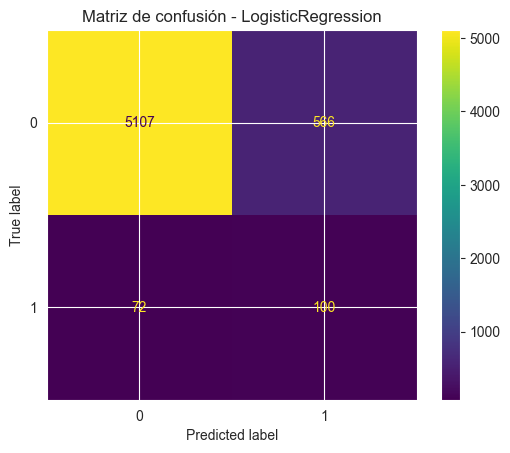

AUC-ROC (train): 0.8321
AUC-ROC (test) : 0.8360
PR-AUC  (train): 0.2319
PR-AUC  (test) : 0.2755
[LogisticRegression] Accuracy train: 0.8875 | test: 0.8955
[LogisticRegression] Balanced Acc train: 0.7282 | test: 0.7319
[LogisticRegression] Precision(1): 0.1521 | Recall(1): 0.5581 | F1(1): 0.2391
[LogisticRegression] Confusion matrix (test):
[[5138  535]
 [  76   96]]


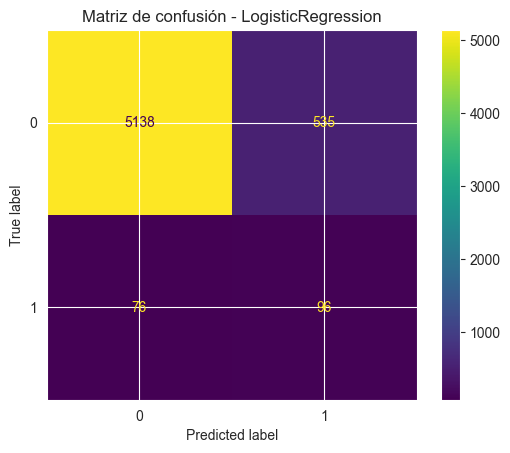

AUC-ROC (train): 0.8316
AUC-ROC (test) : 0.8357
PR-AUC  (train): 0.2303
PR-AUC  (test) : 0.2729
[LogisticRegression] Accuracy train: 0.9334 | test: 0.9403
[LogisticRegression] Balanced Acc train: 0.6862 | test: 0.6958
[LogisticRegression] Precision(1): 0.2294 | Recall(1): 0.4360 | F1(1): 0.3006
[LogisticRegression] Confusion matrix (test):
[[5421  252]
 [  97   75]]


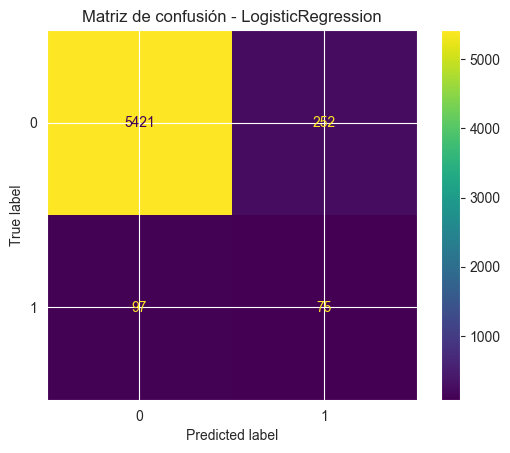

AUC-ROC (train): 0.8311
AUC-ROC (test) : 0.8325
PR-AUC  (train): 0.2742
PR-AUC  (test) : 0.3579
[LogisticRegression] Accuracy train: 0.9055 | test: 0.9110
[LogisticRegression] Balanced Acc train: 0.7142 | test: 0.7146
[LogisticRegression] Precision(1): 0.1667 | Recall(1): 0.5058 | F1(1): 0.2507
[LogisticRegression] Confusion matrix (test):
[[5238  435]
 [  85   87]]


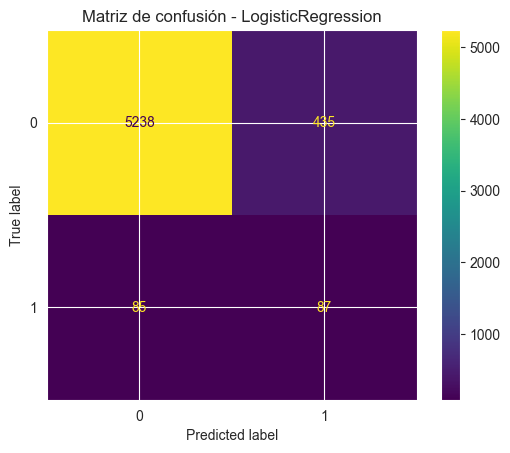

AUC-ROC (train): 0.8304
AUC-ROC (test) : 0.8319
PR-AUC  (train): 0.2652
PR-AUC  (test) : 0.3451
[LogisticRegression] Accuracy train: 0.9020 | test: 0.9092
[LogisticRegression] Balanced Acc train: 0.7180 | test: 0.7192
[LogisticRegression] Precision(1): 0.1657 | Recall(1): 0.5174 | F1(1): 0.2511
[LogisticRegression] Confusion matrix (test):
[[5225  448]
 [  83   89]]


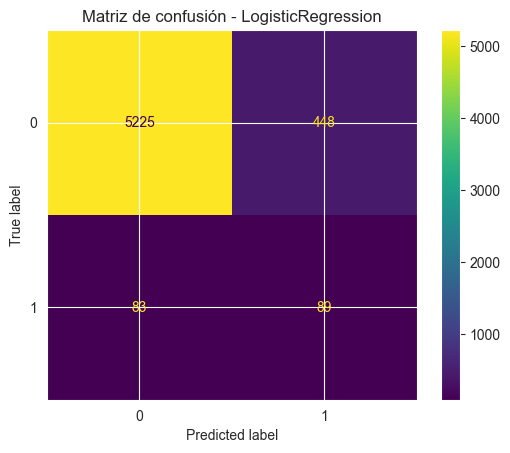

AUC-ROC (train): 0.8302
AUC-ROC (test) : 0.8322
PR-AUC  (train): 0.2606
PR-AUC  (test) : 0.3372
[LogisticRegression] Accuracy train: 0.9206 | test: 0.9273
[LogisticRegression] Balanced Acc train: 0.7001 | test: 0.7229
[LogisticRegression] Precision(1): 0.2037 | Recall(1): 0.5058 | F1(1): 0.2905
[LogisticRegression] Confusion matrix (test):
[[5333  340]
 [  85   87]]


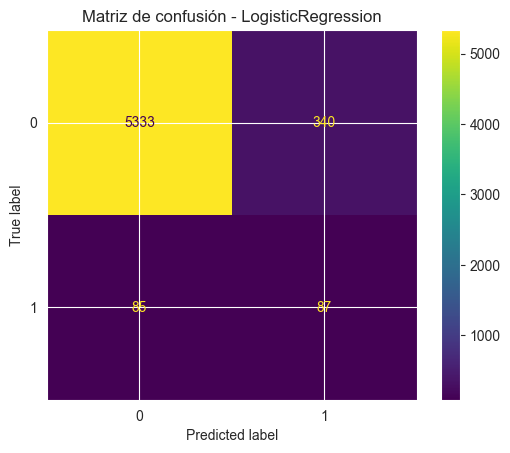

AUC-ROC (train): 0.8300
AUC-ROC (test) : 0.8319
PR-AUC  (train): 0.2561
PR-AUC  (test) : 0.3275
[LogisticRegression] Accuracy train: 0.9149 | test: 0.9206
[LogisticRegression] Balanced Acc train: 0.7049 | test: 0.7195
[LogisticRegression] Precision(1): 0.1867 | Recall(1): 0.5058 | F1(1): 0.2727
[LogisticRegression] Confusion matrix (test):
[[5294  379]
 [  85   87]]


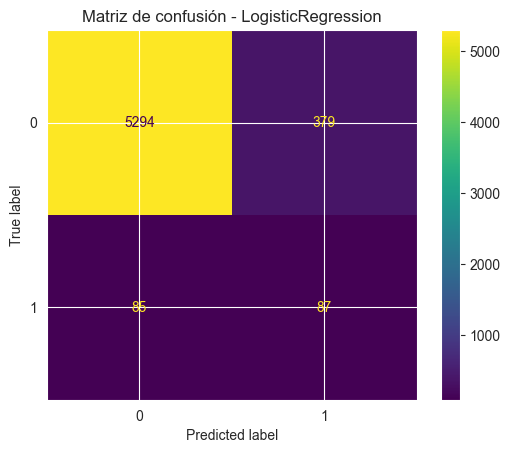

AUC-ROC (train): 0.8303
AUC-ROC (test) : 0.8326
PR-AUC  (train): 0.2545
PR-AUC  (test) : 0.3251
[LogisticRegression] Accuracy train: 0.9138 | test: 0.9186
[LogisticRegression] Balanced Acc train: 0.7050 | test: 0.7213
[LogisticRegression] Precision(1): 0.1833 | Recall(1): 0.5116 | F1(1): 0.2699
[LogisticRegression] Confusion matrix (test):
[[5281  392]
 [  84   88]]


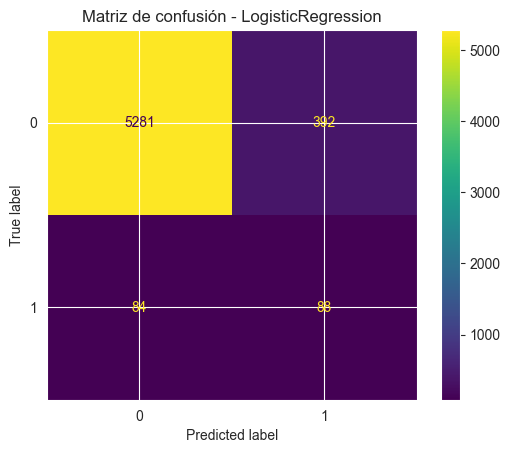

AUC-ROC (train): 0.8303
AUC-ROC (test) : 0.8326
PR-AUC  (train): 0.2509
PR-AUC  (test) : 0.3195
[LogisticRegression] Accuracy train: 0.9123 | test: 0.9187
[LogisticRegression] Balanced Acc train: 0.7142 | test: 0.7242
[LogisticRegression] Precision(1): 0.1850 | Recall(1): 0.5174 | F1(1): 0.2726
[LogisticRegression] Confusion matrix (test):
[[5281  392]
 [  83   89]]


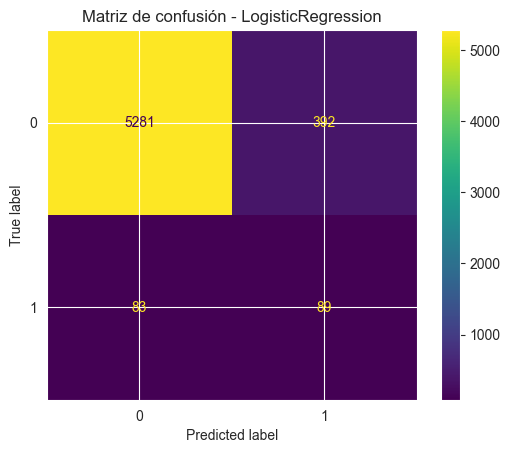

AUC-ROC (train): 0.8335
AUC-ROC (test) : 0.8343
PR-AUC  (train): 0.2579
PR-AUC  (test) : 0.3181
[LogisticRegression] Accuracy train: 0.8999 | test: 0.9062
[LogisticRegression] Balanced Acc train: 0.7156 | test: 0.7290
[LogisticRegression] Precision(1): 0.1655 | Recall(1): 0.5407 | F1(1): 0.2534
[LogisticRegression] Confusion matrix (test):
[[5204  469]
 [  79   93]]


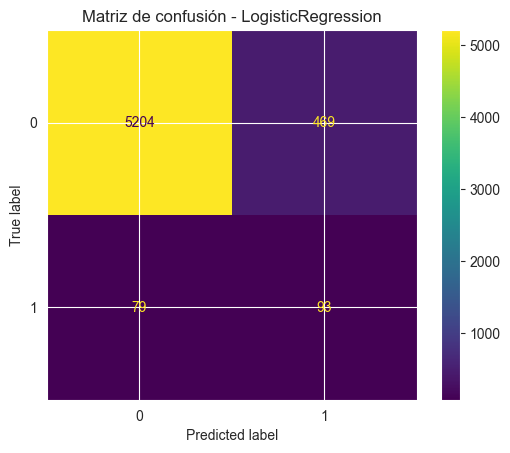

AUC-ROC (train): 0.8301
AUC-ROC (test) : 0.8308
PR-AUC  (train): 0.2355
PR-AUC  (test) : 0.2870
[LogisticRegression] Accuracy train: 0.8956 | test: 0.9004
[LogisticRegression] Balanced Acc train: 0.7112 | test: 0.7147
[LogisticRegression] Precision(1): 0.1514 | Recall(1): 0.5174 | F1(1): 0.2342
[LogisticRegression] Confusion matrix (test):
[[5174  499]
 [  83   89]]


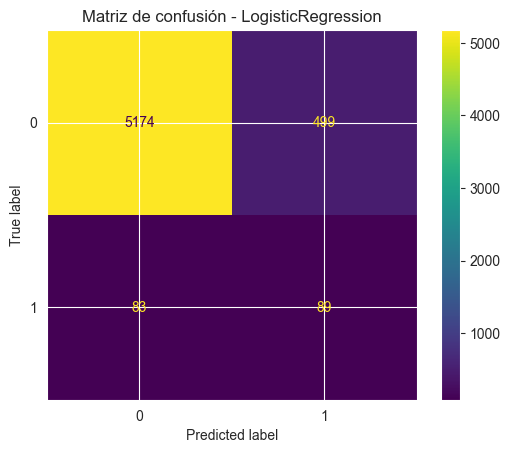

AUC-ROC (train): 0.8256
AUC-ROC (test) : 0.8257
PR-AUC  (train): 0.2181
PR-AUC  (test) : 0.2704
[LogisticRegression] Accuracy train: 0.8910 | test: 0.8962
[LogisticRegression] Balanced Acc train: 0.7088 | test: 0.7125
[LogisticRegression] Precision(1): 0.1452 | Recall(1): 0.5174 | F1(1): 0.2268
[LogisticRegression] Confusion matrix (test):
[[5149  524]
 [  83   89]]


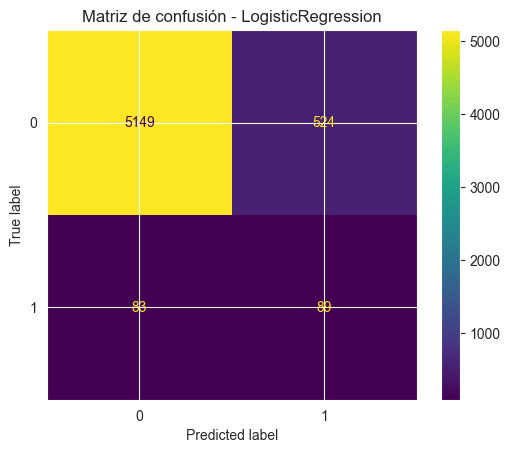

AUC-ROC (train): 0.8239
AUC-ROC (test) : 0.8238
PR-AUC  (train): 0.2099
PR-AUC  (test) : 0.2624
[LogisticRegression] Accuracy train: 0.8791 | test: 0.8862
[LogisticRegression] Balanced Acc train: 0.7133 | test: 0.7272
[LogisticRegression] Precision(1): 0.1401 | Recall(1): 0.5581 | F1(1): 0.2240
[LogisticRegression] Confusion matrix (test):
[[5084  589]
 [  76   96]]


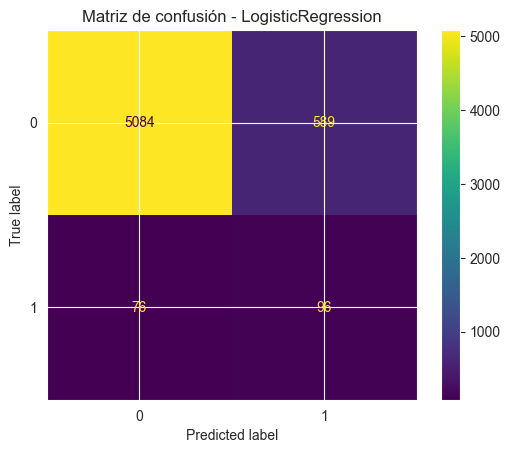

AUC-ROC (train): 0.8230
AUC-ROC (test) : 0.8225
PR-AUC  (train): 0.2053
PR-AUC  (test) : 0.2560
[LogisticRegression] Accuracy train: 0.8732 | test: 0.8802
[LogisticRegression] Balanced Acc train: 0.7166 | test: 0.7241
[LogisticRegression] Precision(1): 0.1333 | Recall(1): 0.5581 | F1(1): 0.2152
[LogisticRegression] Confusion matrix (test):
[[5049  624]
 [  76   96]]


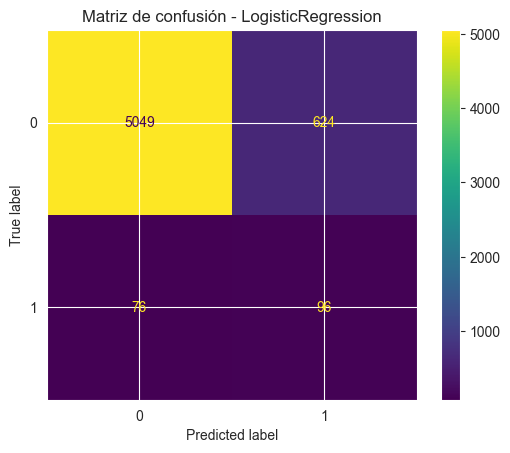

AUC-ROC (train): 0.8225
AUC-ROC (test) : 0.8219
PR-AUC  (train): 0.2032
PR-AUC  (test) : 0.2529


In [6]:
from src.model_utils.mod_evaluation import run_model_and_evaluate_reg_log
import pandas as pd

solvers = ["lbfgs", "saga", "newton-cg", "newton-cholesky"]
samplers = [None, "ro", "smote", "b_smote", "svm_smote", "adasyn"]
ratios = [0.05, 0.10, 0.20, 0.30, 0.4, 0.5]

results = []

for solver in solvers:
    for sampler in samplers:
        if sampler is None:
            rf, aucs, fp, fn, ex = run_model_and_evaluate_reg_log(
                X_train, y_train, X_test, y_test,
                solver=solver, sampler=None, sampling_strategy=0.2, balanced='balanced'
            )
            results.append({**ex, "ratio": "None", "solver": solver, **rf, **aucs, "fp": len(fp), "fn": len(fn)})
        else:
            for ratio in ratios:
                rf, aucs, fp, fn, ex = run_model_and_evaluate_reg_log(
                    X_train, y_train, X_test, y_test,
                    solver=solver, sampler=sampler, sampling_strategy=ratio
                )
                results.append({**ex, "ratio": ratio, "solver": solver, **rf, **aucs, "fp": len(fp), "fn": len(fn)})

df_res = pd.DataFrame(results)



In [13]:
df_res_sorted_recall = df_res.sort_values(["recall_test", "precision_test"], ascending=[False, False])
df_res_sorted_recall

threshold  val_precision_at_threshold  val_recall_at_threshold  \
8     0.133822                    0.109069                 0.649635   
39    0.133314                    0.108802                 0.649635   
101   0.133278                    0.108802                 0.649635   
70    0.133062                    0.108273                 0.649635   
34    0.265196                    0.127778                 0.671533   
..         ...                         ...                      ...   
22    0.401883                    0.184848                 0.445255   
19    0.150789                    0.218868                 0.423358   
81    0.147758                    0.212230                 0.430657   
50    0.144452                    0.204082                 0.437956   
112   0.144465                    0.204082                 0.437956   

     val_fbeta_at_threshold    sampler ratio           solver  train_accuracy  \
8                  0.326246      smote   0.1            lbfgs        0.833162   
39                 0.325769      smote   0.1             saga        0.832606   
101                0.325769      smote   0.1  newton-cholesky        0.832606   
70                 0.324818      smote   0.1        newton-cg        0.832606   
34                 0.362776         ro   0.2             saga        0.849846   
..                      ...        ...   ...              ...             ...   
22                 0.347380  svm_smote   0.3            lbfgs        0.923169   
19                 0.356704  svm_smote  0.05            lbfgs        0.936644   
81                 0.357143  svm_smote  0.05        newton-cg        0.935147   
50                 0.356295  svm_smote  0.05             saga        0.933436   
112                0.356295  svm_smote  0.05  newton-cholesky        0.933436   

     test_accuracy  train_balanced_accuracy  ...    tn   fp  fn   tp  \
8         0.839692                 0.741143  ...  4795  878  59  113   
39        0.839350                 0.741562  ...  4793  880  59  113   
101       0.839350                 0.741562  ...  4793  880  59  113   
70        0.839008                 0.741562  ...  4791  882  59  113   
34        0.854234                 0.747620  ...  4882  791  61  111   
..             ...                      ...  ...   ...  ...  ..  ...   
22        0.930368                 0.695054  ...  5352  321  86   86   
19        0.944226                 0.683646  ...  5444  229  97   75   
81        0.941660                 0.683580  ...  5429  244  97   75   
50        0.940462                 0.686227  ...  5422  251  97   75   
112       0.940291                 0.686227  ...  5421  252  97   75   

                  conf_matrix  \
8    [[4795, 878], [59, 113]]   
39   [[4793, 880], [59, 113]]   
101  [[4793, 880], [59, 113]]   
70   [[4791, 882], [59, 113]]   
34   [[4882, 791], [61, 111]]   
..                        ...   
22    [[5352, 321], [86, 86]]   
19    [[5444, 229], [97, 75]]   
81    [[5429, 244], [97, 75]]   
50    [[5422, 251], [97, 75]]   
112   [[5421, 252], [97, 75]]   

                                 classification_report  auc-roc-train  \
8    {'0': {'precision': 0.9878450762257932, 'recal...       0.829142   
39   {'0': {'precision': 0.9878400659521847, 'recal...       0.829123   
101  {'0': {'precision': 0.9878400659521847, 'recal...       0.829117   
70   {'0': {'precision': 0.9878350515463917, 'recal...       0.829157   
34   {'0': {'precision': 0.987659316204734, 'recall...       0.836381   
..                                                 ...            ...   
22   {'0': {'precision': 0.9841853622655388, 'recal...       0.829932   
19   {'0': {'precision': 0.9824941346327378, 'recal...       0.831113   
81   {'0': {'precision': 0.9824466159971046, 'recal...       0.831099   
50   {'0': {'precision': 0.9824243522377242, 'recal...       0.831118   
112  {'0': {'precision': 0.9824211670895252, 'recal...       0.831108   

     auc-roc-test pr-auc-train pr-auc-te

In [9]:
df_best_pr = df_res.sort_values("pr-auc-test", ascending=False).head(10)
df_best_pr

threshold  val_precision_at_threshold  val_recall_at_threshold  \
81    0.147758                    0.212230                 0.430657   
112   0.144465                    0.204082                 0.437956   
50    0.144452                    0.204082                 0.437956   
19    0.150789                    0.218868                 0.423358   
51    0.169527                    0.163170                 0.510949   
113   0.169526                    0.162791                 0.510949   
82    0.169992                    0.163551                 0.510949   
20    0.171465                    0.165877                 0.510949   
1     0.085466                    0.130374                 0.686131   
63    0.084253                    0.129076                 0.693431   

     val_fbeta_at_threshold    sampler ratio           solver  train_accuracy  \
81                 0.357143  svm_smote  0.05        newton-cg        0.935147   
112                0.356295  svm_smote  0.05  newton-cholesky        0.933436   
50                 0.356295  svm_smote  0.05             saga        0.933436   
19                 0.356704  svm_smote  0.05            lbfgs        0.936644   
51                 0.358240  svm_smote   0.1             saga        0.905501   
113                0.357873  svm_smote   0.1  newton-cholesky        0.905501   
82                 0.358607  svm_smote   0.1        newton-cg        0.905758   
20                 0.360825  svm_smote   0.1            lbfgs        0.906485   
1                  0.370370         ro  0.05            lbfgs        0.850060   
63                 0.369938         ro  0.05        newton-cg        0.847279   

     test_accuracy  train_balanced_accuracy  ...    tn   fp  fn   tp  \
81        0.941660                 0.683580  ...  5429  244  97   75   
112       0.940291                 0.686227  ...  5421  252  97   75   
50        0.940462                 0.686227  ...  5422  251  97   75   
19        0.944226                 0.683646  ...  5444  229  97   75   
51        0.911035                 0.714183  ...  5238  435  85   87   
113       0.911035                 0.714183  ...  5238  435  85   87   
82        0.911377                 0.713609  ...  5240  433  85   87   
20        0.912233                 0.711867  ...  5245  428  85   87   
1         0.854919                 0.744907  ...  4889  784  64  108   
63        0.851839                 0.744886  ...  4870  803  63  109   

                  conf_matrix  \
81    [[5429, 244], [97, 75]]   
112   [[5421, 252], [97, 75]]   
50    [[5422, 251], [97, 75]]   
19    [[5444, 229], [97, 75]]   
51    [[5238, 435], [85, 87]]   
113   [[5238, 435], [85, 87]]   
82    [[5240, 433], [85, 87]]   
20    [[5245, 428], [85, 87]]   
1    [[4889, 784], [64, 108]]   
63   [[4870, 803], [63, 109]]   

                                 classification_report  auc-roc-train  \
81   {'0': {'precision': 0.9824466159971046, 'recal...       0.831099   
112  {'0': {'precision': 0.9824211670895252, 'recal...       0.831108   
50   {'0': {'precision': 0.9824243522377242, 'recal...       0.831118   
19   {'0': {'precision': 0.9824941346327378, 'recal...       0.831113   
51   {'0': {'precision': 0.9840315611497276, 'recal...       0.830486   
113  {'0': {'precision': 0.9840315611497276, 'recal...       0.830449   
82   {'0': {'precision': 0.984037558685446, 'recall...       0.830443   
20   {'0': {'precision': 0.9840525328330206, 'recal...       0.830485   
1    {'0': {'precision': 0.9870785382596406, 'recal...       0.835178   
63   {'0': {'precision': 0.9872288668153254, 'recal...       0.835292   

     auc-roc-test pr-auc-train pr-auc-test  
81       0.832500     0.274188    0.357990  
112      0.832519     0.274177    0.357902  
50       0.832538     0.274171    0.357898  
19       0.832682     0.274205    0.356478  
51       0.831929     0.265293    0.345275  
113      0.831896     0.265201    0.345108  
82       0.831892     0.265285    0.345079  
20       0

Vamos a probar estos modelos y a evaluarlos pero utilizando Boruta para la selección de variables

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	20
Iteration: 	7 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
I

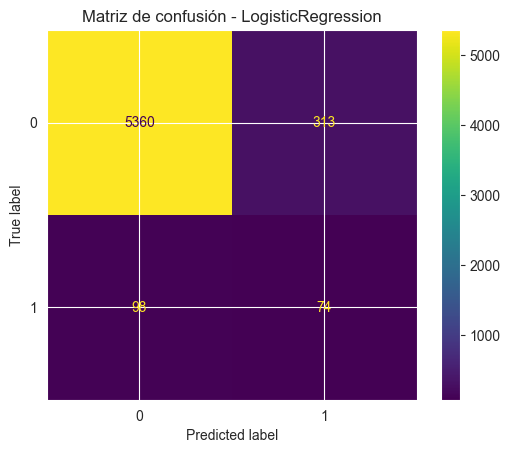

AUC-ROC (train): 0.7987
AUC-ROC (test) : 0.8048
PR-AUC  (train): 0.2686
PR-AUC  (test) : 0.3226
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	20
Iteration: 	7 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	20


BorutaPy finished running.

Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	20
Las variables seleccionadas con Boruta son: Index(['Prima', 'ValorVehículo', 'Antigüedad'], dtype='object')
Las variables tentativas con Boruta son: Index([], dtype='object')
[LogisticRegression] Accuracy train: 0.9068 | test: 0.9206
[LogisticRegression] Balanced Acc train: 0.6960 | test: 0.7026
[LogisticRegression] Precision(1): 0.1784 | Recall(1): 0.4709 | F1(1): 0.2588
[Lo

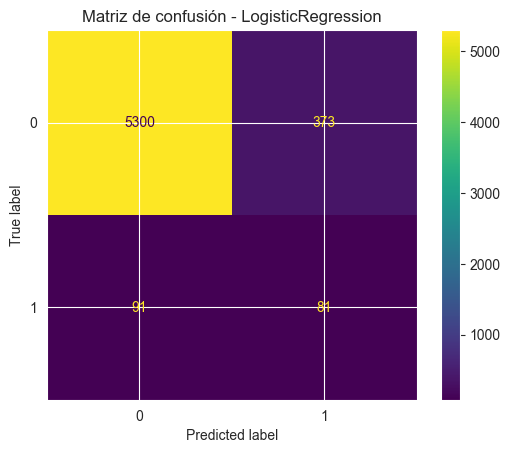

AUC-ROC (train): 0.7912
AUC-ROC (test) : 0.8042
PR-AUC  (train): 0.3249
PR-AUC  (test) : 0.3178
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	20
Iteration: 	7 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	20


BorutaPy finished running.

Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	20
Las variables seleccionadas con Boruta son: Index(['Prima', 'ValorVehículo', 'Antigüedad'], dtype='object')
Las variables tentativas con Boruta son: Index([], dtype='object')
[LogisticRegression] Accuracy train: 0.8990 | test: 0.9126
[LogisticRegression] Balanced Acc train: 0.7057 | test: 0.7069
[LogisticRegression] Precision(1): 0.1657 | Recall(1): 0.4884 | F1(1): 0.2474
[Lo

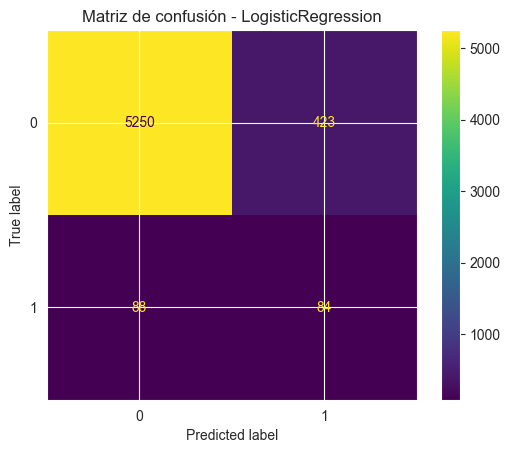

AUC-ROC (train): 0.8051
AUC-ROC (test) : 0.8069
PR-AUC  (train): 0.3294
PR-AUC  (test) : 0.3274
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	20
Iteration: 	7 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	20


BorutaPy finished running.

Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	20
Las variables seleccionadas con Boruta son: Index(['Prima', 'ValorVehículo', 'Antigüedad'], dtype='object')
Las variables tentativas con Boruta son: Index([], dtype='object')
[LogisticRegression] Accuracy train: 0.7936 | test: 0.8027
[LogisticRegression] Balanced Acc train: 0.7206 | test: 0.7490
[LogisticRegression] Precision(1): 0.0976 | Recall(1): 0.6919 | F1(1): 0.1711
[Lo

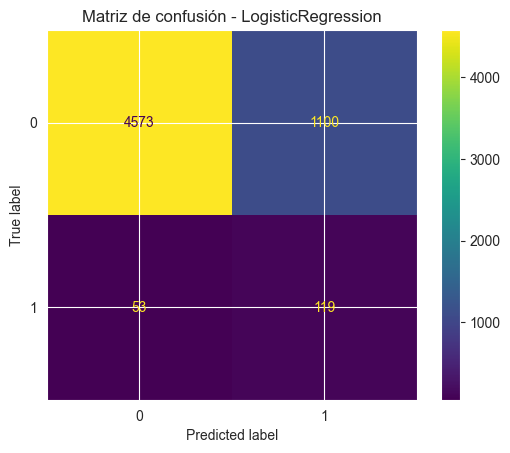

AUC-ROC (train): 0.7965
AUC-ROC (test) : 0.8095
PR-AUC  (train): 0.3120
PR-AUC  (test) : 0.3260
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	18
Iteration: 	7 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	18
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	18
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	18
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	18
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	20


BorutaPy finished running.

Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	20
Las variables seleccionadas con Boruta son: Index(['Prima', 'ValorVehículo', 'Antigüedad'], dtype='object')
Las variables tenta

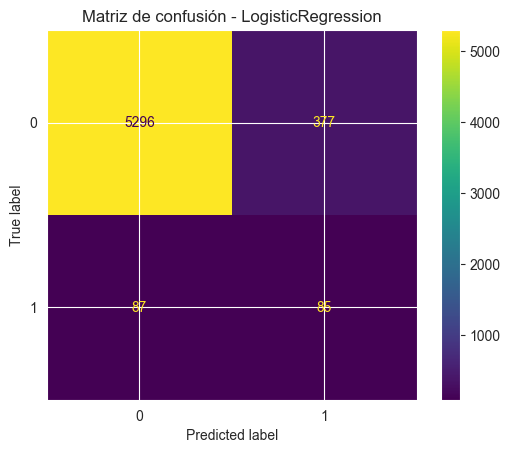

AUC-ROC (train): 0.8252
AUC-ROC (test) : 0.8094
PR-AUC  (train): 0.3671
PR-AUC  (test) : 0.3251
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	18
Iteration: 	7 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	18
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	18
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	18
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	18
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	18
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	18
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	18
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	19
Iteration: 	15 / 100
Confirmed:

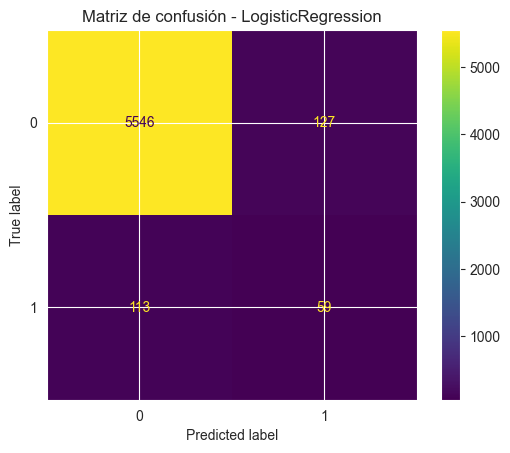

AUC-ROC (train): 0.8327
AUC-ROC (test) : 0.7926
PR-AUC  (train): 0.4598
PR-AUC  (test) : 0.3156


In [7]:
from src.model_utils.utils import boruta_selected_vars
from src.model_utils.mod_evaluation import run_model_and_evaluate_reg_log

results_boruta = []

X_train_selected, X_train_tentative = boruta_selected_vars(X_train, y_train)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log(
 X_train[X_train_selected], y_train,
    X_test[X_train_selected], y_test
)
results_boruta.append({**extra, "sampler": None, "ratio": None, "solver": 'lgbs', **rf_metrics, **roc_auc_dict, "fp": len(fp_id), "fn": len(fn_id)})

X_train_ro_selected, X_train_ro_tentative = boruta_selected_vars(X_train_ro, y_train_ro)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log(
 X_train_ro[X_train_ro_selected], y_train_ro,
    X_test[X_train_ro_selected], y_test
)

results_boruta.append({**extra, "sampler": 'ro', "ratio": 0.05, "solver": 'lgbs', **rf_metrics, **roc_auc_dict, "fp": len(fp_id), "fn": len(fn_id)})

X_train_sm_selected, X_train_sm_tentative = boruta_selected_vars(X_train_sm, y_train_sm)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log(
 X_train_sm[X_train_sm_selected], y_train_sm,
    X_test[X_train_sm_selected], y_test
)

results_boruta.append({**extra, "sampler": 'smote', "ratio": 0.05, "solver": 'lgbs', **rf_metrics, **roc_auc_dict, "fp": len(fp_id), "fn": len(fn_id)})

X_train_adasyn_selected, X_train_adasyn_tentative = boruta_selected_vars(X_train_adasyn, y_train_adasyn)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log(
X_train_adasyn[X_train_adasyn_selected], y_train_adasyn,
    X_test[X_train_adasyn_selected], y_test
)

results_boruta.append({**extra, "sampler": 'adasyn', "ratio": 0.05, "solver": 'lgbs', **rf_metrics, **roc_auc_dict, "fp": len(fp_id), "fn": len(fn_id)})

X_train_bsm_selected, X_train_bsm_tentative = boruta_selected_vars(X_train_bsm, y_train_bsm)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log(
X_train_bsm[X_train_bsm_selected], y_train_bsm,
    X_test[X_train_bsm_selected], y_test
)

results_boruta.append({**extra, "sampler": 'b_smote', "ratio": 0.05, "solver": 'lgbs', **rf_metrics, **roc_auc_dict, "fp": len(fp_id), "fn": len(fn_id)})

X_train_svmsm_selected, X_train_svmsm_tentative = boruta_selected_vars(X_train_svmsm, y_train_svmsm)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra= run_model_and_evaluate_reg_log(
X_train_svmsm[X_train_svmsm_selected], y_train_svmsm,
    X_test[X_train_svmsm_selected], y_test
)

results_boruta.append({**extra, "sampler": 'svsm_smote', "ratio": 0.05, "solver": 'lgbs', **rf_metrics, **roc_auc_dict, "fp": len(fp_id), "fn": len(fn_id)})



In [11]:
import pandas as pd

df_res_boruta = pd.DataFrame(results_boruta)

df_res_boruta


threshold  val_precision_at_threshold  val_recall_at_threshold  \
0   0.089355                    0.197015                 0.481752   
1   0.127120                    0.233480                 0.466960   
2   0.125866                    0.244980                 0.537445   
3   0.082294                    0.150808                 0.702929   
4   0.138953                    0.279570                 0.572687   
5   0.174984                    0.506667                 0.502203   

   val_fbeta_at_threshold     sampler  ratio solver  train_accuracy  \
0                0.373726        None    NaN   lgbs        0.924025   
1                0.389134          ro   0.05   lgbs        0.906771   
2                0.433855       smote   0.05   lgbs        0.898963   
3                0.405797      adasyn   0.05   lgbs        0.793552   
4                0.473416     b_smote   0.05   lgbs        0.908954   
5                0.503089  svsm_smote   0.05   lgbs        0.950720   

   test_accuracy  train_balanced_accuracy  ...    tn    fp   fn   tp  \
0       0.929683                 0.697612  ...  5360   313   98   74   
1       0.920616                 0.695958  ...  5300   373   91   81   
2       0.912575                 0.705682  ...  5250   423   88   84   
3       0.802737                 0.720649  ...  4573  1100   53  119   
4       0.920616                 0.724331  ...  5296   377   87   85   
5       0.958939                 0.706883  ...  5546   127  113   59   

                 conf_matrix  \
0    [[5360, 313], [98, 74]]   
1    [[5300, 373], [91, 81]]   
2    [[5250, 423], [88, 84]]   
3  [[4573, 1100], [53, 119]]   
4    [[5296, 377], [87, 85]]   
5   [[5546, 127], [113, 59]]   

                               classification_report  auc-roc-train  \
0  {'0': {'precision': 0.982044705020154, 'recall...       0.798687   
1  {'0': {'precision': 0.9831200148395474, 'recal...       0.791180   
2  {'0': {'precision': 0.9835144248782316, 'recal...       0.805121   
3  {'0': {'precision': 0.9885430177258971, 'recal...       0.796514   
4  {'0': {'precision': 0.9838380085454208, 'recal...       0.825177   
5  {'0': {'precision': 0.9800318077398834, 'recal...       0.832750   

   auc-roc-test pr-auc-train pr-auc-test  
0      0.804827     0.268629    0.322620  
1      0.804216     0.324879    0.317799  
2      0.806930     0.329448    0.327375  
3      0.809466     0.311970    0.325982  
4      0.809429     0.367122    0.325053  
5      0.792624     0.459835    0.315634  

[6 rows x 24 columns]